### Imports

In [228]:
#pip install cufflinks

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px

In [230]:
df = pd.read_csv("IPL_all_ball.csv" )

In [231]:
df

match_id  season start_date                             venue  \
0         335982    2008  4/18/2008             M Chinnaswamy Stadium   
1         335982    2008  4/18/2008             M Chinnaswamy Stadium   
2         335982    2008  4/18/2008             M Chinnaswamy Stadium   
3         335982    2008  4/18/2008             M Chinnaswamy Stadium   
4         335982    2008  4/18/2008             M Chinnaswamy Stadium   
...          ...     ...        ...                               ...   
225948   1312200    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
225949   1312200    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
225950   1312200    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
225951   1312200    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
225952   1312200    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   

        innings  over_ball  Over  ball                 batting_team  \
0             2        6.8     6     8  Royal Challengers Bangalore   
1             2        2.7     2     7  Royal Challengers Bangalore   
2             2        3.1     3     1  Royal Challengers Bangalore   
3             2        3.2     3     2  Royal Challengers Bangalore   
4             2        3.3     3     3  Royal Challengers Bangalore   
...         ...        ...   ...   ...                          ...   
225948        1       13.6    13     6             Rajasthan Royals   
225949        1       14.1    14     1             Rajasthan Royals   
225950        1       14.2    14     2             Rajasthan Royals   
225951        1       12.2    12     2             Rajasthan Royals   
225952        2       18.1    18     1               Gujarat Titans   

                 bowling_team  ... wides noballs byes  legbyes  penalty  \
0       Kolkata Knight Riders  ...   NaN     NaN  NaN      NaN      NaN   
1       Kolkata Knight Riders  ...   NaN     NaN  NaN      NaN      NaN   
2       Kolkata Knight Riders  ...   NaN     NaN  NaN      NaN      NaN   
3       Kolkata Knight Riders  ...   NaN     NaN  NaN      NaN      NaN   
4       Kolkata Knight Riders  ...   NaN     NaN  NaN      NaN      NaN   
...                       ...  ...   ...     ...  ...      ...      ...   
225948         Gujarat Titans  ...   NaN     NaN  NaN      NaN      NaN   
225949         Gujarat Titans  ...   NaN     NaN  NaN      NaN      NaN   
225950         Gujarat Titans  ...   NaN     NaN  NaN      NaN      NaN   
225951         Gujarat Titans  ...   NaN     NaN  NaN      NaN      NaN   
225952       Rajasthan Royals  ...   NaN     NaN  NaN      NaN      NaN   

        total_runs  wicket_type  player_dismissed  other_wicket_type  \
0                4          NaN               NaN                NaN   
1                1          NaN               NaN                NaN   
2                2          NaN               NaN                NaN   
3                1          NaN               NaN                NaN   
4                0          NaN               NaN                NaN   
...            ...          ...               ...                ...   
225948           1          NaN               NaN                NaN   
225949           1          NaN               NaN                NaN   
225950           1          NaN               NaN                NaN   
225951           0          NaN               NaN                NaN   
225952           6          NaN               NaN                NaN   

        other_player_dismissed  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
...                        ...  
225948                     NaN  
225949                     NaN  
225950                     NaN  
225951                     NaN  
225952                     NaN  

[225953 rows x 25 columns]

In [232]:
df.rename(columns={'match_id': 'matchId'},inplace=True)

In [233]:
df1 = pd.read_excel('Stadium-Cleanedsheet.xlsx')
df1.head

<bound method NDFrame.head of      Season  Match ID Match-Season Wise  Total Match Num         Date  \
0      2008    335982            2008-1                1  18/04/2008    
1      2008    335983            2008-2                2  19/04/2008    
2      2008    335984            2008-3                3  19/04/2008    
3      2008    335986            2008-4                4  20/04/2008    
4      2008    335985            2008-5                5  20/04/2008    
..      ...       ...               ...              ...          ...   
953    2022   1304116           2022-70              954  22/05/2022    
954    2022   1312197           2022-71              955  24/05/2022    
955    2022   1312198           2022-72              956  25/05/2022    
956    2022   1312199           2022-73              957  27/05/2022    
957    2022   1312200           2022-74              958  29/05/2022    

                 Team Name                       Versus  \
0    Kolkata Knight Riders  Royal 

In [234]:
df2 = pd.read_csv("matches_updated_mens_ipl.csv",encoding='iso-8859-1')
df2

matchId                  event  season Season Wise match_number  \
0     335982  Indian Premier League    2008                   2008-1   
1     335983  Indian Premier League    2008                   2008-2   
2     335984  Indian Premier League    2008                   2008-3   
3     335986  Indian Premier League    2008                   2008-4   
4     335985  Indian Premier League    2008                   2008-5   
..       ...                    ...     ...                      ...   
953  1304116  Indian Premier League    2022                  2022-70   
954  1312197  Indian Premier League    2022                  2022-71   
955  1312198  Indian Premier League    2022                  2022-72   
956  1312199  Indian Premier League    2022                  2022-73   
957  1312200  Indian Premier League    2022                  2022-74   

     Total Matches outcome       Date gender                        team1  \
0                1     NaN  4/18/2008   male  Royal Challengers Bangalore   
1                2     NaN  4/19/2008   male                 Punjab Kings   
2                3     NaN  4/19/2008   male             Delhi Daredevils   
3                4     NaN  4/20/2008   male        Kolkata Knight Riders   
4                5     NaN  4/20/2008   male               Mumbai Indians   
..             ...     ...        ...    ...                          ...   
953            954     NaN  5/22/2022   male          Sunrisers Hyderabad   
954            955     NaN  5/24/2022   male             Rajasthan Royals   
955            956     NaN  5/25/2022   male  Royal Challengers Bangalore   
956            957     NaN  5/27/2022   male  Royal Challengers Bangalore   
957            958     NaN  5/29/2022   male             Rajasthan Royals   

                           team2  ... neutralvenue  \
0          Kolkata Knight Riders  ...          NaN   
1            Chennai Super Kings  ...          NaN   
2               Rajasthan Royals  ...          NaN   
3                Deccan Chargers  ...          NaN   
4    Royal Challengers Bangalore  ...          NaN   
..                           ...  ...          ...   
953                 Punjab Kings  ...          NaN   
954               Gujarat Titans  ...          NaN   
955         Lucknow Super Giants  ...          NaN   
956             Rajasthan Royals  ...          NaN   
957               Gujarat Titans  ...          NaN   

                                                 venue method toss_decision  \
0        M Chinnaswamy Stadium (Bengaluru, Bangalore)     NaN         field   
1    Punjab Cricket Association IS Bindra Stadium (...    NaN           bat   
2                        Arun Jaitley Stadium (Delhi)     NaN           bat   
3                              Eden Gardens (Kolkata)     NaN           bat   
4                           Wankhede Stadium (Mumbai)     NaN           bat   
..                                                 ...    ...           ...   
953                         Wankhede Stadium (Mumbai)     NaN           bat   
954                            Eden Gardens (Kolkata)     NaN         field   
955                            Eden Gardens (Kolkata)     NaN         field   
956                 Narendra Modi Stadium (Ahmedabad)     NaN         field   
957                 Narendra Modi Stadium (Ahmedabad)     NaN           bat   

           city              tv_umpire date2                       winner  \
0     Bangalore              AM Saheba   NaN        Kolkata Knight Riders   
1    Chandigarh              RB Tiffin   NaN          Chennai Super Kings   
2         Delhi              IL Howell   NaN             Delhi Daredevils   
3       Kolkata              Asad Rauf   NaN        Kolkata Knight Riders   
4        Mumbai         AV Jayaprakash   NaN  Royal Challengers Bangalore   
..          ...                    ...   ...                          ...   
953      Mumbai            CB Gaffaney   NaN                 Punjab Kings   
9

Actually we have totally three dataset through these we going to predict IPL winner match prediction

### Merge

Marge first set of dataset

In [235]:
df1.columns

Index(['Season', 'Match ID', 'Match-Season Wise', 'Total Match Num', 'Date',
       'Team Name', 'Versus', 'Venue', 'Result'],
      dtype='object')

In [236]:
df2.columns

Index(['matchId', 'event', 'season', 'Season Wise match_number',
       'Total Matches', 'outcome', 'Date', 'gender', 'team1', 'team2',
       'toss_winner', 'umpire2', 'match_referee', 'reserve_umpire',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'dl_applied',
       'date1', 'neutralvenue', 'venue', 'method', 'toss_decision', 'city',
       'tv_umpire', 'date2', 'winner', 'umpire1', 'eliminator'],
      dtype='object')

In [237]:
df1=df1.rename(columns={'Match ID': 'matchId'})

In [238]:
df1.head(1)

Season  matchId Match-Season Wise  Total Match Num         Date  \
0    2008   335982            2008-1                1  18/04/2008    

               Team Name                       Versus  \
0  Kolkata Knight Riders  Royal Challengers Bangalore   

                                           Venue  \
0  M Chinnaswamy Stadium (Bengaluru, Bangalore)    

                                    Result  
0  Kolkata Knight Riders won by 140 runs

In [239]:
df11 = df2.merge(df1, on="matchId")

In [240]:
df11

matchId                  event  season Season Wise match_number  \
0     335982  Indian Premier League    2008                   2008-1   
1     335983  Indian Premier League    2008                   2008-2   
2     335984  Indian Premier League    2008                   2008-3   
3     335986  Indian Premier League    2008                   2008-4   
4     335985  Indian Premier League    2008                   2008-5   
..       ...                    ...     ...                      ...   
953  1304116  Indian Premier League    2022                  2022-70   
954  1312197  Indian Premier League    2022                  2022-71   
955  1312198  Indian Premier League    2022                  2022-72   
956  1312199  Indian Premier League    2022                  2022-73   
957  1312200  Indian Premier League    2022                  2022-74   

     Total Matches outcome     Date_x gender                        team1  \
0                1     NaN  4/18/2008   male  Royal Challengers Bangalore   
1                2     NaN  4/19/2008   male                 Punjab Kings   
2                3     NaN  4/19/2008   male             Delhi Daredevils   
3                4     NaN  4/20/2008   male        Kolkata Knight Riders   
4                5     NaN  4/20/2008   male               Mumbai Indians   
..             ...     ...        ...    ...                          ...   
953            954     NaN  5/22/2022   male          Sunrisers Hyderabad   
954            955     NaN  5/24/2022   male             Rajasthan Royals   
955            956     NaN  5/25/2022   male  Royal Challengers Bangalore   
956            957     NaN  5/27/2022   male  Royal Challengers Bangalore   
957            958     NaN  5/29/2022   male             Rajasthan Royals   

                           team2  ...        umpire1 eliminator Season  \
0          Kolkata Knight Riders  ...      Asad Rauf        NaN   2008   
1            Chennai Super Kings  ...      MR Benson        NaN   2008   
2               Rajasthan Royals  ...      Aleem Dar        NaN   2008   
3                Deccan Chargers  ...      BF Bowden        NaN   2008   
4    Royal Challengers Bangalore  ...       SJ Davis        NaN   2008   
..                           ...  ...            ...        ...    ...   
953                 Punjab Kings  ...   AK Chaudhary        NaN   2022   
954               Gujarat Titans  ...   BNJ Oxenford        NaN   2022   
955         Lucknow Super Giants  ...  J Madanagopal        NaN   2022   
956             Rajasthan Royals  ...    CB Gaffaney        NaN   2022   
957               Gujarat Titans  ...    CB Gaffaney        NaN   2022   

    Match-Season Wise  Total Match Num       Date_y              Team Name  \
0              2008-1                1  18/04/2008   Kolkata Knight Riders   
1              2008-2                2  19/04/2008     Chennai Super Kings   
2              2008-3                3  19/04/2008          Delhi Capitals   
3              2008-4                4  20/04/2008          Deccan Charges   
4              2008-5                5  20/04/2008          Mumbai Indians   
..                ...              ...          ...                    ...   
953           2022-70              954  22/05/2022            Punjab Kings   
954           2022-71              955  24/05/2022          Gujarat Titans   
955           2022-72              956  25/05/2022    Lucknow Super Giants   
956           2022-73              957  27/05/2022        Rajasthan Royals   
957           2022-74              958  29/05/2022          Gujarat Titans   

                          Versus  \
0    Royal Challengers Bangalore   
1                   Punjab Kings   
2               Rajasthan Royals   
3          Kolkata Knight Riders   
4    Royal Challengers Bangalore   
..                           ...   
953          Sunrisers Hyderabad   
954             Rajasthan Royals   
955  Royal Challengers Bangalore   
956  Royal Challengers Bangal

In [241]:
df11.columns

Index(['matchId', 'event', 'season', 'Season Wise match_number',
       'Total Matches', 'outcome', 'Date_x', 'gender', 'team1', 'team2',
       'toss_winner', 'umpire2', 'match_referee', 'reserve_umpire',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'dl_applied',
       'date1', 'neutralvenue', 'venue', 'method', 'toss_decision', 'city',
       'tv_umpire', 'date2', 'winner', 'umpire1', 'eliminator', 'Season',
       'Match-Season Wise', 'Total Match Num', 'Date_y', 'Team Name', 'Versus',
       'Venue', 'Result'],
      dtype='object')

### Reading Dataset checking for its shape and info

First we do check the size, structure, and statistical properties of a dataset.

we going to do for ipl match wise first,

In [242]:
df11.shape

(958, 37)

In [243]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 957
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matchId                   958 non-null    int64  
 1   event                     958 non-null    object 
 2   season                    958 non-null    int64  
 3   Season Wise match_number  958 non-null    object 
 4   Total Matches             958 non-null    int64  
 5   outcome                   26 non-null     object 
 6   Date_x                    958 non-null    object 
 7   gender                    958 non-null    object 
 8   team1                     958 non-null    object 
 9   team2                     958 non-null    object 
 10  toss_winner               950 non-null    object 
 11  umpire2                   952 non-null    object 
 12  match_referee             951 non-null    object 
 13  reserve_umpire            928 non-null    object 
 14  win_by_run

In [244]:
df11.date1.value_counts()

5/27/2014    1
5/17/2017    1
Name: date1, dtype: int64

In [245]:
df11.columns

Index(['matchId', 'event', 'season', 'Season Wise match_number',
       'Total Matches', 'outcome', 'Date_x', 'gender', 'team1', 'team2',
       'toss_winner', 'umpire2', 'match_referee', 'reserve_umpire',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'dl_applied',
       'date1', 'neutralvenue', 'venue', 'method', 'toss_decision', 'city',
       'tv_umpire', 'date2', 'winner', 'umpire1', 'eliminator', 'Season',
       'Match-Season Wise', 'Total Match Num', 'Date_y', 'Team Name', 'Versus',
       'Venue', 'Result'],
      dtype='object')

In [246]:
df11.describe()

matchId       season  Total Matches  win_by_runs  win_by_wickets  \
count  9.580000e+02   958.000000     958.000000   423.000000      509.000000   
mean   8.283838e+05  2014.973904     479.500000    30.073286        6.239686   
std    3.376360e+05     4.316664     276.695079    26.785736        1.828664   
min    3.359820e+05  2008.000000       1.000000     1.000000        1.000000   
25%    5.012592e+05  2011.000000     240.250000    11.000000        5.000000   
50%    8.297340e+05  2015.000000     479.500000    22.000000        6.000000   
75%    1.175370e+06  2019.000000     718.750000    41.000000        8.000000   
max    1.312200e+06  2022.000000     958.000000   146.000000       10.000000   

       dl_applied       Season  Total Match Num  
count  958.000000   958.000000       958.000000  
mean     0.019833  2014.973904       479.500000  
std      0.139499     4.316664       276.695079  
min      0.000000  2008.000000         1.000000  
25%      0.000000  2011.000000       240.250000  
50%      0.000000  2015.000000       479.500000  
75%      0.000000  2019.000000       718.750000  
max      1.000000  2022.000000       958.000000

In [247]:
df11.describe(include='object')

event Season Wise match_number outcome     Date_x  \
count                     958                      958      26        958   
unique                      1                      958       2        708   
top     Indian Premier League                   2008-1     tie  5/16/2015   
freq                      958                        1      14          2   

       gender                        team1                  team2  \
count     958                          958                    958   
unique      1                           17                     17   
top      male  Royal Challengers Bangalore  Kolkata Knight Riders   
freq      958                          128                    121   

           toss_winner umpire2 match_referee  ...      date2          winner  \
count              950     952           951  ...          2             932   
unique              18      62            25  ...          2              18   
top     Mumbai Indians  S Ravi     J Srinath  ...  5/28/2014  Mumbai Indians   
freq               123      83           180  ...          1             129   

             umpire1       eliminator Match-Season Wise       Date_y  \
count            950               14               958          958   
unique            58                7               958          707   
top     AK Chaudhary  Kings XI Punjab            2008-1  22/04/2017    
freq              95                3                 1            3   

                  Team Name                       Versus  \
count                   958                          958   
unique                   14                           14   
top     Chennai Super Kings  Royal Challengers Bangalore   
freq                    210                          207   

                             Venue                             Result  
count                          958                                958  
unique                          34                                453  
top     Wankhede Stadium (Mumbai)   Mumbai Indians won by 5 wickets    
freq                           104                                 18  

[4 rows x 29 columns]

In [248]:
df11['Team Name'].value_counts().iplot()

(958, 36)

object     29
int64       5
float64     2

In this match wise dataset we have more number of object columns.

In IPL match wise dataset It seems like did not have duplicate records. 
But repeated columns are presented.

Now, we check the size, structure, and statistical properties of IPL ball by ball dataset

We have to remove some teams that wouldn't play current IPL matches

In [249]:
df.shape

(225953, 25)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225953 entries, 0 to 225952
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   matchId                 225953 non-null  int64  
 1   season                  225953 non-null  int64  
 2   start_date              225953 non-null  object 
 3   venue                   225953 non-null  object 
 4   innings                 225953 non-null  int64  
 5   over_ball               225953 non-null  float64
 6   Over                    225953 non-null  int64  
 7   ball                    225953 non-null  int64  
 8   batting_team            225953 non-null  object 
 9   bowling_team            225953 non-null  object 
 10  striker                 225953 non-null  object 
 11  non_striker             225953 non-null  object 
 12  bowler                  225953 non-null  object 
 13  runs_off_bat            225953 non-null  int64  
 14  extras              

In [251]:
df.describe()

matchId         season        innings      over_ball  \
count  2.259530e+05  225953.000000  225953.000000  225953.000000   
mean   8.320488e+05    2015.027014       1.483871       9.547611   
std    3.379539e+05       4.321753       0.503104       5.683982   
min    3.359820e+05    2008.000000       1.000000       0.100000   
25%    5.012620e+05    2011.000000       1.000000       4.500000   
50%    8.297370e+05    2015.000000       1.000000       9.400000   
75%    1.178395e+06    2019.000000       2.000000      14.400000   
max    1.312200e+06    2022.000000       6.000000      19.900000   

                Over           ball   runs_off_bat         extras  \
count  225953.000000  225953.000000  225953.000000  225953.000000   
mean        9.185707       3.619045       1.243524       0.066908   
std         5.681794       1.809884       1.618169       0.341471   
min         0.000000       1.000000       0.000000       0.000000   
25%         4.000000       2.000000       0.000000       0.000000   
50%         9.000000       4.000000       1.000000       0.000000   
75%        14.000000       5.000000       1.000000       0.000000   
max        19.000000       9.000000       6.000000       7.000000   

             wides     noballs        byes      legbyes  penalty  \
count  7026.000000  918.000000  583.000000  3531.000000      2.0   
mean      1.206234    1.038126    1.859348     1.301614      5.0   
std       0.792866    0.342652    1.307175     0.843200      0.0   
min       1.000000    1.000000    1.000000     1.000000      5.0   
25%       1.000000    1.000000    1.000000     1.000000      5.0   
50%       1.000000    1.000000    1.000000     1.000000      5.0   
75%       1.000000    1.000000    4.000000     1.000000      5.0   
max       5.000000    5.000000    4.000000     5.000000      5.0   

          total_runs  other_wicket_type  other_player_dismissed  
count  225953.000000                0.0                     0.0  
mean        1.310432                NaN                     NaN  
std         1.606054                NaN                     NaN  
min         0.000000                NaN                     NaN  
25%         0.000000                NaN                     NaN  
50%         1.000000                NaN                     NaN  
75%         1.000000                NaN                     NaN  
max         7.000000                NaN                     NaN

In [252]:
df.describe(include='object')

start_date         venue    batting_team    bowling_team  striker  \
count       225953        225953          225953          225953   225953   
unique         706            49              18              18      605   
top     10/18/2020  Eden Gardens  Mumbai Indians  Mumbai Indians  V Kohli   
freq           520         17988           27825           27854     5266   

       non_striker    bowler wicket_type player_dismissed  
count       225953    225953       11151            11151  
unique         595       473          10              573  
top       S Dhawan  R Ashwin      caught        RG Sharma  
freq          5526      4024        6837              194

In [253]:
df.columns

Index(['matchId', 'season', 'start_date', 'venue', 'innings', 'over_ball',
       'Over', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'total_runs', 'wicket_type',
       'player_dismissed', 'other_wicket_type', 'other_player_dismissed'],
      dtype='object')

In [254]:
df.wicket_type.value_counts().iplot()
plt.show()

(225953, 22)

float64(8), int64(5), object(9)

In this IPL ball by ball dataset we have more number of rows.
These data starting from 2008 upto 2022.

### EDA and Feature Engineering

Lets do treatment for IPL match wise dataset first,

In [255]:
df11.isna().sum()/len(df11)*100

matchId                      0.000000
event                        0.000000
season                       0.000000
Season Wise match_number     0.000000
Total Matches                0.000000
outcome                     97.286013
Date_x                       0.000000
gender                       0.000000
team1                        0.000000
team2                        0.000000
toss_winner                  0.835073
umpire2                      0.626305
match_referee                0.730689
reserve_umpire               3.131524
win_by_runs                 55.845511
win_by_wickets              46.868476
player_of_match              1.252610
dl_applied                   0.000000
date1                       99.791232
neutralvenue                91.544885
venue                        0.000000
method                      98.329854
toss_decision                0.835073
city                         0.000000
tv_umpire                    1.043841
date2                       99.791232
winner      

##### Removing old teams / updating teams new names

In [256]:
df11.toss_winner.unique() 

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       nan, 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [257]:
df11.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians', nan,
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

Some team change there team names season by season. 

In [258]:
df11['toss_winner'].replace('Kings XI Punjab','Punjab Kings',inplace=True)
df11['toss_winner'].replace('Delhi Daredevils','Delhi Capitals',inplace=True)
df11['toss_winner'].replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)
df11['toss_winner'].replace('Deccan chargers','Sunrisers Hyderabad',inplace=True)

In [259]:
df11['winner'].replace('Kings XI Punjab','Punjab Kings',inplace=True)
df11['winner'].replace('Delhi Daredevils','Delhi Capitals',inplace=True)
df11['winner'].replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)
df11['winner'].replace('Deccan chargers','Sunrisers Hyderabad',inplace=True)

so, we changed team names by upcoming IPL team names. 

In [260]:
df11.toss_winner.value_counts()

Mumbai Indians                 123
Delhi Capitals                 116
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Punjab Kings                    94
Sunrisers Hyderabad             74
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   15
Rising Pune Supergiant          13
Gujarat Titans                  10
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Name: toss_winner, dtype: int64

In [261]:
df11.winner.value_counts()

Mumbai Indians                 129
Chennai Super Kings            121
Kolkata Knight Riders          113
Royal Challengers Bangalore    107
Delhi Capitals                 100
Punjab Kings                    98
Rajasthan Royals                94
Sunrisers Hyderabad             74
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Gujarat Titans                  12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

Now, all team names are currently changed.

Take the team they going to play 2023 match

In [262]:
df11.winner.value_counts().iplot()

We only take the team that could play 2023 IPL matches, We could drop the remaining team. 

In [263]:
df11.win_by_runs.unique()

array([140.,  33.,  nan,   6.,  66.,  13.,  10.,  45.,   3.,   9.,  29.,
         5.,  18.,  23.,  12.,  65.,  25.,   1.,  14.,  41., 105.,  19.,
        75.,  92.,  11.,  24.,  27.,  38.,   8.,  78.,  16.,  53.,   2.,
         4.,  31.,  55.,  98.,  34.,  36.,  17.,  39.,  40.,  67.,  63.,
        37.,  57.,  35.,  22.,  21.,  48.,  26.,  20.,  85.,  32.,  76.,
       111.,  82.,  43.,  58.,  28.,  74.,  42.,  59.,  46.,   7.,  47.,
        86.,  44.,  87., 130.,  15.,  60.,  77.,  30.,  50.,  93.,  72.,
        62.,  97., 138.,  71., 144.,  80.,  51.,  61., 146.,  64., 102.,
       118.,  49.,  69.,  88.,  54.,  91.,  52.])

In [264]:
df11.win_by_wickets.unique()

array([nan,  9.,  5.,  6.,  3.,  7.,  4., 10.,  8.,  2.,  1.])

We could not able to fill above both columns by null values, If we did that we could not able to predict currently.

reserve_umpire,               
umpire2,                  
match_referee,              
umpire1,                         
tv_umpire

We do not need above five umpire columns

In [265]:
df11.method.value_counts(dropna=False)

NaN    942
D/L     16
Name: method, dtype: int64

In [266]:
df11=df11.rename(columns={'method':'D/L'})
df11['D/L'].fillna(value=0,inplace =True)
df11['D/L'].replace('D/L',1,inplace=True)
df11["D/L"].value_counts()

0    942
1     16
Name: D/L, dtype: int64

In [267]:
df11["D/L"].isna()/len(df11)*100

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
953    0.0
954    0.0
955    0.0
956    0.0
957    0.0
Name: D/L, Length: 958, dtype: float64

We make D/L(method) is 0.0 percent

In [268]:
df11.neutralvenue.unique()

array([nan, 'Yes'], dtype=object)

In [269]:
df11['neutralvenue'].fillna(value=0,inplace =True)

In [270]:
df11['neutralvenue'].replace('Yes',1,inplace=True)

In [271]:
df11.neutralvenue.unique()

array([0, 1], dtype=int64)

### Dropping columns

In [272]:
df11.set_index("matchId", inplace=True)

In [273]:
df11.drop([336030,392187,392193,501217,501265,548338,548340,829754,829763,829813,1082619,1178424],inplace = True)

336030,392187,392193,501217,501265,548338,548340,829754,829763,829813,1082619,1178424.                                           

above typed matchId's are dropped matches so we have to drop it. We going to predict the winner at the final so we do not need no result matches.

In [274]:
df11.eliminator.unique()

array([nan, 'Rajasthan Royals', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Kolkata Knight Riders'], dtype=object)

actually eliminator columns is for tied matches

In [275]:
df11.drop([392190,419121,598004,598017,729315,829741,1082625,1175365,1178426,1216493,1216547,1216512,1216517,1254077],inplace =True)

392190,419121,598004,598017,729315,829741,1082625,1175365,1178426,1216493,1216547,1216512,1216517,1254077

above typed matchId's are tied matches so we have to drop it. We going to predict the winner at the final so we do not need tied matche results.

postponed matches

In [276]:
df11.drop(['date1','date2'],axis=1,inplace=True)

In [277]:
df11.drop([734043,1082648],inplace=True)

above typed matchId's are postponed matches so we have to drop it. We going to predict the winner at the final so we do not need postponed matche results.

In [278]:
df11.drop(["eliminator",'reserve_umpire','umpire2','match_referee','umpire1','tv_umpire','outcome'], axis=1,inplace=True)

In [279]:
df11.isna().sum()/len(df11)*100

event                        0.000000
season                       0.000000
Season Wise match_number     0.000000
Total Matches                0.000000
Date_x                       0.000000
gender                       0.000000
team1                        0.000000
team2                        0.000000
toss_winner                  0.000000
win_by_runs                 54.623656
win_by_wickets              45.376344
player_of_match              0.000000
dl_applied                   0.000000
neutralvenue                 0.000000
venue                        0.000000
D/L                          0.000000
toss_decision                0.000000
city                         0.000000
winner                       0.000000
Season                       0.000000
Match-Season Wise            0.000000
Total Match Num              0.000000
Date_y                       0.000000
Team Name                    0.000000
Versus                       0.000000
Venue                        0.000000
Result      

Now, some columns are shows 0.000000 after dropped matches columns

##### Target variable

In [280]:
df11.rename(columns={'Result':"result"},inplace=True)

In [281]:
df11["win_by_wickets"]=df11["win_by_wickets"]

In [282]:
df11["win_by_wickets"].fillna(value=0, inplace=True)

In [283]:
df11["Result"] =[ 0 if x < 1 else 1 for x in df11["win_by_wickets"]]

In [284]:
df11.head(5)

event  season Season Wise match_number  \
matchId                                                           
335982   Indian Premier League    2008                   2008-1   
335983   Indian Premier League    2008                   2008-2   
335984   Indian Premier League    2008                   2008-3   
335986   Indian Premier League    2008                   2008-4   
335985   Indian Premier League    2008                   2008-5   

         Total Matches     Date_x gender                        team1  \
matchId                                                                 
335982               1  4/18/2008   male  Royal Challengers Bangalore   
335983               2  4/19/2008   male                 Punjab Kings   
335984               3  4/19/2008   male             Delhi Daredevils   
335986               4  4/20/2008   male        Kolkata Knight Riders   
335985               5  4/20/2008   male               Mumbai Indians   

                               team2                  toss_winner  \
matchId                                                             
335982         Kolkata Knight Riders  Royal Challengers Bangalore   
335983           Chennai Super Kings          Chennai Super Kings   
335984              Rajasthan Royals             Rajasthan Royals   
335986               Deccan Chargers              Deccan Chargers   
335985   Royal Challengers Bangalore               Mumbai Indians   

         win_by_runs  ...                       winner Season  \
matchId               ...                                       
335982         140.0  ...        Kolkata Knight Riders   2008   
335983          33.0  ...          Chennai Super Kings   2008   
335984           NaN  ...               Delhi Capitals   2008   
335986           NaN  ...        Kolkata Knight Riders   2008   
335985           NaN  ...  Royal Challengers Bangalore   2008   

         Match-Season Wise  Total Match Num       Date_y  \
matchId                                                    
335982              2008-1                1  18/04/2008    
335983              2008-2                2  19/04/2008    
335984              2008-3                3  19/04/2008    
335986              2008-4                4  20/04/2008    
335985              2008-5                5  20/04/2008    

                     Team Name                       Versus  \
matchId                                                       
335982   Kolkata Knight Riders  Royal Challengers Bangalore   
335983     Chennai Super Kings                 Punjab Kings   
335984          Delhi Capitals             Rajasthan Royals   
335986          Deccan Charges        Kolkata Knight Riders   
335985          Mumbai Indians  Royal Challengers Bangalore   

                                                     Venue  \
matchId                                                      
335982       M Chinnaswamy Stadium (Bengaluru, Bangalore)    
335983   Punjab Cricket Association IS Bindra Stadium (...   
335984                       Arun Jaitley Stadium (Delhi)    
335986                             Eden Gardens (Kolkata)    
335985                          Wankhede Stadium (Mumbai)    

                                                 result  Result  
matchId                                                          
335982          Kolkata Knight Riders won by 140 runs         0  
335983             Chennai Super Kings won by 33 runs         0  
335984              Delhi Daredevils won by 9 wickets         1  
335986         Kolkata Knight Riders won by 5 wickets         1  
335985   Royal Challengers Bangalore won by 5 wickets         1  

[5 rows x 28 columns]

The target column('Result') is created by win by runs column, therefore the team who playes the first half is win or not if they won then 1 else lost then 0.

In [285]:
df11.isna().sum()/len(df11)*100

event                        0.000000
season                       0.000000
Season Wise match_number     0.000000
Total Matches                0.000000
Date_x                       0.000000
gender                       0.000000
team1                        0.000000
team2                        0.000000
toss_winner                  0.000000
win_by_runs                 54.623656
win_by_wickets               0.000000
player_of_match              0.000000
dl_applied                   0.000000
neutralvenue                 0.000000
venue                        0.000000
D/L                          0.000000
toss_decision                0.000000
city                         0.000000
winner                       0.000000
Season                       0.000000
Match-Season Wise            0.000000
Total Match Num              0.000000
Date_y                       0.000000
Team Name                    0.000000
Versus                       0.000000
Venue                        0.000000
result      

Lets do this treatment for IPL ball by ball wise dataset

In [286]:
df.isna().sum()/len(df)*100

matchId                     0.000000
season                      0.000000
start_date                  0.000000
venue                       0.000000
innings                     0.000000
over_ball                   0.000000
Over                        0.000000
ball                        0.000000
batting_team                0.000000
bowling_team                0.000000
striker                     0.000000
non_striker                 0.000000
bowler                      0.000000
runs_off_bat                0.000000
extras                      0.000000
wides                      96.890504
noballs                    99.593721
byes                       99.741982
legbyes                    98.437286
penalty                    99.999115
total_runs                  0.000000
wicket_type                95.064903
player_dismissed           95.064903
other_wicket_type         100.000000
other_player_dismissed    100.000000
dtype: float64

In [287]:
df["wides"].fillna(value=0,inplace=True)
df["noballs"].fillna(value=0, inplace=True)
df["legbyes"].fillna(value=0,inplace=True)
df["byes"].fillna(value=0, inplace=True)
df["penalty"].fillna(value=0,inplace=True)
df["wicket_type"].fillna(value=0, inplace=True)

In [288]:
df.isna().sum()/len(df)*100

matchId                     0.000000
season                      0.000000
start_date                  0.000000
venue                       0.000000
innings                     0.000000
over_ball                   0.000000
Over                        0.000000
ball                        0.000000
batting_team                0.000000
bowling_team                0.000000
striker                     0.000000
non_striker                 0.000000
bowler                      0.000000
runs_off_bat                0.000000
extras                      0.000000
wides                       0.000000
noballs                     0.000000
byes                        0.000000
legbyes                     0.000000
penalty                     0.000000
total_runs                  0.000000
wicket_type                 0.000000
player_dismissed           95.064903
other_wicket_type         100.000000
other_player_dismissed    100.000000
dtype: float64

Now, some columns are shows 0.000000 after fillna with 0

##### Removing old teams / updating teams new names

Some team change there team names season by season. 

In [289]:
df['batting_team'].replace('Kings XI Punjab','Punjab Kings',inplace=True)
df['batting_team'].replace('Delhi Daredevils','Delhi Capitals',inplace=True)
df['batting_team'].replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)
df['batting_team'].replace('Deccan chargers','Sunrisers Hyderabad',inplace=True)

In [290]:
df['bowling_team'].replace('Kings XI Punjab','Punjab Kings',inplace=True)
df['bowling_team'].replace('Delhi Daredevils','Delhi Capitals',inplace=True)
df['bowling_team'].replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)
df['bowling_team'].replace('Deccan chargers','Sunrisers Hyderabad',inplace=True)

So, we changed team names by upcoming IPL team names 

### Dropping columns

In [291]:
df.drop(["other_wicket_type","other_player_dismissed"],axis=1,inplace=True)

In [292]:
df.isna().sum()/len(df)*100

matchId              0.000000
season               0.000000
start_date           0.000000
venue                0.000000
innings              0.000000
over_ball            0.000000
Over                 0.000000
ball                 0.000000
batting_team         0.000000
bowling_team         0.000000
striker              0.000000
non_striker          0.000000
bowler               0.000000
runs_off_bat         0.000000
extras               0.000000
wides                0.000000
noballs              0.000000
byes                 0.000000
legbyes              0.000000
penalty              0.000000
total_runs           0.000000
wicket_type          0.000000
player_dismissed    95.064903
dtype: float64

In [293]:
df.set_index("matchId", inplace=True)

In [294]:
df.drop([501265,829763,829813,1178424,734043,1082648,392190,419121,598004,598017,729315,829741,1082625,1175365,1178426,1216493,1216547,1216512,1216517,1254077], inplace = True)

above mentioned matchId's are dropped, tied & postponed matches so we have to drop it. We going to predict the winner at the final

#### sort the balls by ascending order

In [295]:
df = df.sort_values(by=['matchId', 'innings','over_ball'])

In [296]:
df

season start_date                             venue  innings  \
matchId                                                                 
335982     2008  4/18/2008             M Chinnaswamy Stadium        1   
335982     2008  4/18/2008             M Chinnaswamy Stadium        1   
335982     2008  4/18/2008             M Chinnaswamy Stadium        1   
335982     2008  4/18/2008             M Chinnaswamy Stadium        1   
335982     2008  4/18/2008             M Chinnaswamy Stadium        1   
...         ...        ...                               ...      ...   
1312200    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad        2   
1312200    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad        2   
1312200    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad        2   
1312200    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad        2   
1312200    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad        2   

         over_ball  Over  ball           batting_team  \
matchId                                                 
335982         0.1     0     1  Kolkata Knight Riders   
335982         0.2     0     2  Kolkata Knight Riders   
335982         0.3     0     3  Kolkata Knight Riders   
335982         0.4     0     4  Kolkata Knight Riders   
335982         0.5     0     5  Kolkata Knight Riders   
...            ...   ...   ...                    ...   
1312200       17.3    17     3         Gujarat Titans   
1312200       17.4    17     4         Gujarat Titans   
1312200       17.5    17     5         Gujarat Titans   
1312200       17.6    17     6         Gujarat Titans   
1312200       18.1    18     1         Gujarat Titans   

                        bowling_team       striker  ... runs_off_bat extras  \
matchId                                             ...                       
335982   Royal Challengers Bangalore    SC Ganguly  ...            0      1   
335982   Royal Challengers Bangalore   BB McCullum  ...            0      0   
335982   Royal Challengers Bangalore   BB McCullum  ...            0      1   
335982   Royal Challengers Bangalore   BB McCullum  ...            0      0   
335982   Royal Challengers Bangalore   BB McCullum  ...            0      0   
...                              ...           ...  ...          ...    ...   
1312200             Rajasthan Royals     DA Miller  ...            1      0   
1312200             Rajasthan Royals  Shubman Gill  ...            0      0   
1312200             Rajasthan Royals  Shubman Gill  ...            1      0   
1312200             Rajasthan Royals     DA Miller  ...            2      0   
1312200             Rajasthan Royals  Shubman Gill  ...            6      0   

         wides  noballs  byes  legbyes  penalty  total_runs  wicket_type  \
matchId                                                                    
335982     0.0      0.0   0.0      1.0      0.0           1            0   
335982     0.0      0.0   0.0      0.0      0.0           0            0   
335982     1.0      0.0   0.0      0.0      0.0           1            0   
335982     0.0      0.0   0.0      0.0      0.0           0            0   
335982     0.0      0.0   0.0      0.0      0.0           0            0   
...        ...      ...   ...      ...      ...         ...          ...   
1312200    0.0      0.0   0.0      0.0      0.0           1            0   
1312200    0.0      0.0   0.0      0.0      0.0           0            0   
1312200    0.0      0.0   0.0      0.0      0.0           1            0   
1312200    0.0      0.0   0.0      0.0      0.0           2            0   
1312200    0.0      0.0   0.0      0.0      0.0           6            0   

         player_dismissed  
matchId                    
335982                NaN  
335982                NaN  
335982                NaN  
335982                NaN  
335982                NaN  
...                   ...  
1312200               NaN  
1312200               NaN  
1312200             

It's done now we could create some columns we should need.

#### Creating new column as total_runs

In [297]:
df.head(5)

season start_date                  venue  innings  over_ball  Over  \
matchId                                                                       
335982     2008  4/18/2008  M Chinnaswamy Stadium        1        0.1     0   
335982     2008  4/18/2008  M Chinnaswamy Stadium        1        0.2     0   
335982     2008  4/18/2008  M Chinnaswamy Stadium        1        0.3     0   
335982     2008  4/18/2008  M Chinnaswamy Stadium        1        0.4     0   
335982     2008  4/18/2008  M Chinnaswamy Stadium        1        0.5     0   

         ball           batting_team                 bowling_team  \
matchId                                                             
335982      1  Kolkata Knight Riders  Royal Challengers Bangalore   
335982      2  Kolkata Knight Riders  Royal Challengers Bangalore   
335982      3  Kolkata Knight Riders  Royal Challengers Bangalore   
335982      4  Kolkata Knight Riders  Royal Challengers Bangalore   
335982      5  Kolkata Knight Riders  Royal Challengers Bangalore   

             striker  ... runs_off_bat extras  wides  noballs  byes  legbyes  \
matchId               ...                                                      
335982    SC Ganguly  ...            0      1    0.0      0.0   0.0      1.0   
335982   BB McCullum  ...            0      0    0.0      0.0   0.0      0.0   
335982   BB McCullum  ...            0      1    1.0      0.0   0.0      0.0   
335982   BB McCullum  ...            0      0    0.0      0.0   0.0      0.0   
335982   BB McCullum  ...            0      0    0.0      0.0   0.0      0.0   

         penalty  total_runs  wicket_type  player_dismissed  
matchId                                                      
335982       0.0           1            0               NaN  
335982       0.0           0            0               NaN  
335982       0.0           1            0               NaN  
335982       0.0           0            0               NaN  
335982       0.0           0            0               NaN  

[5 rows x 22 columns]

In [298]:
a = df.groupby(["matchId","innings"]).sum()

In [299]:
a

season  over_ball  Over  ball  runs_off_bat  extras  wides  \
matchId innings                                                               
335982  1        248992     1213.8  1169   448           205      17    9.0   
        2        202808      763.3   725   383            63      19   11.0   
335983  1        248992     1211.9  1167   449           234       6    3.0   
        2        248992     1215.9  1171   449           196      11    5.0   
335984  1        244976     1195.4  1152   434           122       7    3.0   
...                 ...        ...   ...   ...           ...     ...    ...   
1312198 2        262860     1330.4  1281   494           171      22   15.0   
1312199 1        256794     1277.0  1230   470           142      15    7.0   
        2        220398      973.9   936   379           161       0    0.0   
1312200 1        242640     1182.0  1140   420           128       2    0.0   
        2        228486     1003.8   963   408           124       9    8.0   

                 noballs  byes  legbyes  penalty  total_runs  
matchId innings                                               
335982  1            0.0   4.0      4.0      0.0         222  
        2            0.0   0.0      8.0      0.0          82  
335983  1            1.0   0.0      2.0      0.0         240  
        2            0.0   2.0      4.0      0.0         207  
335984  1            0.0   1.0      3.0      0.0         129  
...                  ...   ...      ...      ...         ...  
1312198 2            0.0   5.0      2.0      0.0         193  
1312199 1            0.0   4.0      4.0      0.0         157  
        2            0.0   0.0      0.0      0.0         161  
1312200 1            0.0   0.0      2.0      0.0         130  
        2            0.0   0.0      1.0      0.0         133  

[1860 rows x 12 columns]

In [300]:
a["total_runs"] = a["runs_off_bat"] + a["extras"]

In [301]:
a

season  over_ball  Over  ball  runs_off_bat  extras  wides  \
matchId innings                                                               
335982  1        248992     1213.8  1169   448           205      17    9.0   
        2        202808      763.3   725   383            63      19   11.0   
335983  1        248992     1211.9  1167   449           234       6    3.0   
        2        248992     1215.9  1171   449           196      11    5.0   
335984  1        244976     1195.4  1152   434           122       7    3.0   
...                 ...        ...   ...   ...           ...     ...    ...   
1312198 2        262860     1330.4  1281   494           171      22   15.0   
1312199 1        256794     1277.0  1230   470           142      15    7.0   
        2        220398      973.9   936   379           161       0    0.0   
1312200 1        242640     1182.0  1140   420           128       2    0.0   
        2        228486     1003.8   963   408           124       9    8.0   

                 noballs  byes  legbyes  penalty  total_runs  
matchId innings                                               
335982  1            0.0   4.0      4.0      0.0         222  
        2            0.0   0.0      8.0      0.0          82  
335983  1            1.0   0.0      2.0      0.0         240  
        2            0.0   2.0      4.0      0.0         207  
335984  1            0.0   1.0      3.0      0.0         129  
...                  ...   ...      ...      ...         ...  
1312198 2            0.0   5.0      2.0      0.0         193  
1312199 1            0.0   4.0      4.0      0.0         157  
        2            0.0   0.0      0.0      0.0         161  
1312200 1            0.0   0.0      2.0      0.0         130  
        2            0.0   0.0      1.0      0.0         133  

[1860 rows x 12 columns]

In [302]:
df.reset_index(inplace=True)

In [303]:
a.reset_index(inplace=True)

In [304]:
a1 = a[["matchId","innings","total_runs"]]

In [305]:
a1.head(2)

matchId  innings  total_runs
0   335982        1         222
1   335982        2          82

#### creating new column called target

We only need score of 1st innings

our target is winner prediction so we only need the score of first innings

In [306]:
a1 = a1[a1['innings']==1]

In [307]:
a1

matchId  innings  total_runs
0      335982        1         222
2      335983        1         240
4      335984        1         129
6      335985        1         165
8      335986        1         110
...       ...      ...         ...
1850  1304116        1         157
1852  1312197        1         188
1854  1312198        1         207
1856  1312199        1         157
1858  1312200        1         130

[930 rows x 3 columns]

In [308]:
a1['target'] = a1['total_runs'] + 1

In [309]:
a1

matchId  innings  total_runs  target
0      335982        1         222     223
2      335983        1         240     241
4      335984        1         129     130
6      335985        1         165     166
8      335986        1         110     111
...       ...      ...         ...     ...
1850  1304116        1         157     158
1852  1312197        1         188     189
1854  1312198        1         207     208
1856  1312199        1         157     158
1858  1312200        1         130     131

[930 rows x 4 columns]

#### Merge with the dataset

In [310]:
a.set_index(['matchId','innings'], inplace=True)

In [311]:
df.set_index(['matchId','innings'], inplace=True)

In [312]:
df11 = df11.merge(a1[['matchId','target']], on='matchId')

In [313]:
#df11 = pd.merge(df11, a1, on=['matchId'])

In [314]:
df11.head()

matchId                  event  season Season Wise match_number  \
0   335982  Indian Premier League    2008                   2008-1   
1   335983  Indian Premier League    2008                   2008-2   
2   335984  Indian Premier League    2008                   2008-3   
3   335986  Indian Premier League    2008                   2008-4   
4   335985  Indian Premier League    2008                   2008-5   

   Total Matches     Date_x gender                        team1  \
0              1  4/18/2008   male  Royal Challengers Bangalore   
1              2  4/19/2008   male                 Punjab Kings   
2              3  4/19/2008   male             Delhi Daredevils   
3              4  4/20/2008   male        Kolkata Knight Riders   
4              5  4/20/2008   male               Mumbai Indians   

                         team2                  toss_winner  ...  Season  \
0        Kolkata Knight Riders  Royal Challengers Bangalore  ...    2008   
1          Chennai Super Kings          Chennai Super Kings  ...    2008   
2             Rajasthan Royals             Rajasthan Royals  ...    2008   
3              Deccan Chargers              Deccan Chargers  ...    2008   
4  Royal Challengers Bangalore               Mumbai Indians  ...    2008   

   Match-Season Wise Total Match Num       Date_y              Team Name  \
0             2008-1               1  18/04/2008   Kolkata Knight Riders   
1             2008-2               2  19/04/2008     Chennai Super Kings   
2             2008-3               3  19/04/2008          Delhi Capitals   
3             2008-4               4  20/04/2008          Deccan Charges   
4             2008-5               5  20/04/2008          Mumbai Indians   

                        Versus  \
0  Royal Challengers Bangalore   
1                 Punjab Kings   
2             Rajasthan Royals   
3        Kolkata Knight Riders   
4  Royal Challengers Bangalore   

                                               Venue  \
0      M Chinnaswamy Stadium (Bengaluru, Bangalore)    
1  Punjab Cricket Association IS Bindra Stadium (...   
2                      Arun Jaitley Stadium (Delhi)    
3                            Eden Gardens (Kolkata)    
4                         Wankhede Stadium (Mumbai)    

                                           result Result target  
0         Kolkata Knight Riders won by 140 runs        0    223  
1            Chennai Super Kings won by 33 runs        0    241  
2             Delhi Daredevils won by 9 wickets        1    130  
3        Kolkata Knight Riders won by 5 wickets        1    111  
4  Royal Challengers Bangalore won by 5 wickets        1    166  

[5 rows x 30 columns]

#### only select rows for the below mentioned teams

In [315]:
teams = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [316]:
df = df[df['batting_team'].isin(teams)]
df = df[df['bowling_team'].isin(teams)]

In [317]:
df

season start_date                             venue  \
matchId innings                                                        
335982  1          2008  4/18/2008             M Chinnaswamy Stadium   
        1          2008  4/18/2008             M Chinnaswamy Stadium   
        1          2008  4/18/2008             M Chinnaswamy Stadium   
        1          2008  4/18/2008             M Chinnaswamy Stadium   
        1          2008  4/18/2008             M Chinnaswamy Stadium   
...                 ...        ...                               ...   
1312200 2          2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
        2          2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
        2          2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
        2          2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
        2          2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   

                 over_ball  Over  ball           batting_team  \
matchId innings                                                 
335982  1              0.1     0     1  Kolkata Knight Riders   
        1              0.2     0     2  Kolkata Knight Riders   
        1              0.3     0     3  Kolkata Knight Riders   
        1              0.4     0     4  Kolkata Knight Riders   
        1              0.5     0     5  Kolkata Knight Riders   
...                    ...   ...   ...                    ...   
1312200 2             17.3    17     3         Gujarat Titans   
        2             17.4    17     4         Gujarat Titans   
        2             17.5    17     5         Gujarat Titans   
        2             17.6    17     6         Gujarat Titans   
        2             18.1    18     1         Gujarat Titans   

                                bowling_team       striker   non_striker  ...  \
matchId innings                                                           ...   
335982  1        Royal Challengers Bangalore    SC Ganguly   BB McCullum  ...   
        1        Royal Challengers Bangalore   BB McCullum    SC Ganguly  ...   
        1        Royal Challengers Bangalore   BB McCullum    SC Ganguly  ...   
        1        Royal Challengers Bangalore   BB McCullum    SC Ganguly  ...   
        1        Royal Challengers Bangalore   BB McCullum    SC Ganguly  ...   
...                                      ...           ...           ...  ...   
1312200 2                   Rajasthan Royals     DA Miller  Shubman Gill  ...   
        2                   Rajasthan Royals  Shubman Gill     DA Miller  ...   
        2                   Rajasthan Royals  Shubman Gill     DA Miller  ...   
        2                   Rajasthan Royals     DA Miller  Shubman Gill  ...   
        2                   Rajasthan Royals  Shubman Gill     DA Miller  ...   

                runs_off_bat  extras  wides  noballs  byes  legbyes  penalty  \
matchId innings                                                                
335982  1                  0       1    0.0      0.0   0.0      1.0      0.0   
        1                  0       0    0.0      0.0   0.0      0.0      0.0   
        1                  0       1    1.0      0.0   0.0      0.0      0.0   
        1                  0       0    0.0      0.0   0.0      0.0      0.0   
        1                  0       0    0.0      0.0   0.0      0.0      0.0   
...                      ...     ...    ...      ...   ...      ...      ...   
1312200 2                  1       0    0.0      0.0   0.0      0.0      0.0   
        2                  0       0    0.0      0.0   0.0      0.0      0.0   
        2                  1       0    0.0      0.0   0.0      0.0      0.0   
        2                  2       0    0.0      0.0   0.0      0.0      0.0   
        2                  6       0    0.0      0.0   0.0      0.0      0.0   

                 total_runs  wicket_type player_dismissed  
matchId innings                                            
335982  1          

#### Only select rows where we are in 2nd innings

In [318]:
df =df.reset_index()

In [319]:
df = df[df['innings']==2]

In [320]:
df

matchId  innings  season start_date                             venue  \
124      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
125      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
126      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
127      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
128      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
...         ...      ...     ...        ...                               ...   
177973  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177974  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177975  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177976  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177977  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   

        over_ball  Over  ball                 batting_team  \
124           0.1     0     1  Royal Challengers Bangalore   
125           0.2     0     2  Royal Challengers Bangalore   
126           0.3     0     3  Royal Challengers Bangalore   
127           0.4     0     4  Royal Challengers Bangalore   
128           0.5     0     5  Royal Challengers Bangalore   
...           ...   ...   ...                          ...   
177973       17.3    17     3               Gujarat Titans   
177974       17.4    17     4               Gujarat Titans   
177975       17.5    17     5               Gujarat Titans   
177976       17.6    17     6               Gujarat Titans   
177977       18.1    18     1               Gujarat Titans   

                 bowling_team  ... runs_off_bat extras wides  noballs  byes  \
124     Kolkata Knight Riders  ...            1      0   0.0      0.0   0.0   
125     Kolkata Knight Riders  ...            0      1   1.0      0.0   0.0   
126     Kolkata Knight Riders  ...            0      0   0.0      0.0   0.0   
127     Kolkata Knight Riders  ...            1      0   0.0      0.0   0.0   
128     Kolkata Knight Riders  ...            1      0   0.0      0.0   0.0   
...                       ...  ...          ...    ...   ...      ...   ...   
177973       Rajasthan Royals  ...            1      0   0.0      0.0   0.0   
177974       Rajasthan Royals  ...            0      0   0.0      0.0   0.0   
177975       Rajasthan Royals  ...            1      0   0.0      0.0   0.0   
177976       Rajasthan Royals  ...            2      0   0.0      0.0   0.0   
177977       Rajasthan Royals  ...            6      0   0.0      0.0   0.0   

        legbyes  penalty  total_runs  wicket_type  player_dismissed  
124         0.0      0.0           1            0               NaN  
125         0.0      0.0           1            0               NaN  
126         0.0      0.0           0            0               NaN  
127         0.0      0.0           1            0               NaN  
128         0.0      0.0           1            0               NaN  
...         ...      ...         ...          ...               ...  
177973      0.0      0.0           1            0               NaN  
177974      0.0      0.0           0            0               NaN  
177975      0.0      0.0           1            0               NaN  
177976      0.0      0.0           2            0               NaN  
177977      0.0      0.0           6            0               NaN  

[85952 rows x 23 columns]

#### Create new row each_ball_runs

In [321]:
df['each_ball_runs'] = df['runs_off_bat'] + df['extras']

In [322]:
df

matchId  innings  season start_date                             venue  \
124      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
125      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
126      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
127      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
128      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
...         ...      ...     ...        ...                               ...   
177973  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177974  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177975  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177976  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177977  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   

        over_ball  Over  ball                 batting_team  \
124           0.1     0     1  Royal Challengers Bangalore   
125           0.2     0     2  Royal Challengers Bangalore   
126           0.3     0     3  Royal Challengers Bangalore   
127           0.4     0     4  Royal Challengers Bangalore   
128           0.5     0     5  Royal Challengers Bangalore   
...           ...   ...   ...                          ...   
177973       17.3    17     3               Gujarat Titans   
177974       17.4    17     4               Gujarat Titans   
177975       17.5    17     5               Gujarat Titans   
177976       17.6    17     6               Gujarat Titans   
177977       18.1    18     1               Gujarat Titans   

                 bowling_team  ... extras wides noballs  byes  legbyes  \
124     Kolkata Knight Riders  ...      0   0.0     0.0   0.0      0.0   
125     Kolkata Knight Riders  ...      1   1.0     0.0   0.0      0.0   
126     Kolkata Knight Riders  ...      0   0.0     0.0   0.0      0.0   
127     Kolkata Knight Riders  ...      0   0.0     0.0   0.0      0.0   
128     Kolkata Knight Riders  ...      0   0.0     0.0   0.0      0.0   
...                       ...  ...    ...   ...     ...   ...      ...   
177973       Rajasthan Royals  ...      0   0.0     0.0   0.0      0.0   
177974       Rajasthan Royals  ...      0   0.0     0.0   0.0      0.0   
177975       Rajasthan Royals  ...      0   0.0     0.0   0.0      0.0   
177976       Rajasthan Royals  ...      0   0.0     0.0   0.0      0.0   
177977       Rajasthan Royals  ...      0   0.0     0.0   0.0      0.0   

        penalty  total_runs  wicket_type  player_dismissed  each_ball_runs  
124         0.0           1            0               NaN               1  
125         0.0           1            0               NaN               1  
126         0.0           0            0               NaN               0  
127         0.0           1            0               NaN               1  
128         0.0           1            0               NaN               1  
...         ...         ...          ...               ...             ...  
177973      0.0           1            0               NaN               1  
177974      0.0           0            0               NaN               0  
177975      0.0           1            0               NaN               1  
177976      0.0           2            0               NaN               2  
177977      0.0           6            0               NaN               6  

[85952 rows x 24 columns]

#### Create new row current_score after each_ball_runs

In [323]:
df.columns

Index(['matchId', 'innings', 'season', 'start_date', 'venue', 'over_ball',
       'Over', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'total_runs', 'wicket_type',
       'player_dismissed', 'each_ball_runs'],
      dtype='object')

In [324]:
df['current_score'] = df.groupby('matchId')['each_ball_runs'].cumsum()

In [325]:
df[['matchId','innings','current_score']].sample(100)

matchId  innings  current_score
26411    419143        2            132
55691    598036        2             79
122685  1178393        2             25
92724    980947        2            102
59724    598058        2             46
...         ...      ...            ...
88959    829817        2            137
35129    501249        2             18
52802    598021        2             50
77206    829709        2             33
21072    419113        2             82

[100 rows x 3 columns]

In [326]:
df

matchId  innings  season start_date                             venue  \
124      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
125      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
126      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
127      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
128      335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
...         ...      ...     ...        ...                               ...   
177973  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177974  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177975  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177976  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
177977  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   

        over_ball  Over  ball                 batting_team  \
124           0.1     0     1  Royal Challengers Bangalore   
125           0.2     0     2  Royal Challengers Bangalore   
126           0.3     0     3  Royal Challengers Bangalore   
127           0.4     0     4  Royal Challengers Bangalore   
128           0.5     0     5  Royal Challengers Bangalore   
...           ...   ...   ...                          ...   
177973       17.3    17     3               Gujarat Titans   
177974       17.4    17     4               Gujarat Titans   
177975       17.5    17     5               Gujarat Titans   
177976       17.6    17     6               Gujarat Titans   
177977       18.1    18     1               Gujarat Titans   

                 bowling_team  ... wides noballs byes  legbyes  penalty  \
124     Kolkata Knight Riders  ...   0.0     0.0  0.0      0.0      0.0   
125     Kolkata Knight Riders  ...   1.0     0.0  0.0      0.0      0.0   
126     Kolkata Knight Riders  ...   0.0     0.0  0.0      0.0      0.0   
127     Kolkata Knight Riders  ...   0.0     0.0  0.0      0.0      0.0   
128     Kolkata Knight Riders  ...   0.0     0.0  0.0      0.0      0.0   
...                       ...  ...   ...     ...  ...      ...      ...   
177973       Rajasthan Royals  ...   0.0     0.0  0.0      0.0      0.0   
177974       Rajasthan Royals  ...   0.0     0.0  0.0      0.0      0.0   
177975       Rajasthan Royals  ...   0.0     0.0  0.0      0.0      0.0   
177976       Rajasthan Royals  ...   0.0     0.0  0.0      0.0      0.0   
177977       Rajasthan Royals  ...   0.0     0.0  0.0      0.0      0.0   

        total_runs  wicket_type  player_dismissed  each_ball_runs  \
124              1            0               NaN               1   
125              1            0               NaN               1   
126              0            0               NaN               0   
127              1            0               NaN               1   
128              1            0               NaN               1   
...            ...          ...               ...             ...   
177973           1            0               NaN               1   
177974           0            0               NaN               0   
177975           1            0               NaN               1   
177976           2            0               NaN               2   
177977           6            0               NaN               6   

        current_score  
124                 1  
125                 2  
126                 2  
127                 3  
128                 4  
...               ...  
177973            124  
177974            124  
177975            125  
177976            127  
177977            133  

[85952 rows x 25 columns]

#### Adding target column

In [327]:
a1

matchId  innings  total_runs  target
0      335982        1         222     223
2      335983        1         240     241
4      335984        1         129     130
6      335985        1         165     166
8      335986        1         110     111
...       ...      ...         ...     ...
1850  1304116        1         157     158
1852  1312197        1         188     189
1854  1312198        1         207     208
1856  1312199        1         157     158
1858  1312200        1         130     131

[930 rows x 4 columns]

In [328]:
df = df.merge(a1[['matchId','target']], on='matchId')

In [329]:
df.head()

matchId  innings  season start_date                  venue  over_ball  \
0   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.1   
1   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.2   
2   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.3   
3   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.4   
4   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.5   

   Over  ball                 batting_team           bowling_team  ...  \
0     0     1  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
1     0     2  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
2     0     3  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
3     0     4  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
4     0     5  Royal Challengers Bangalore  Kolkata Knight Riders  ...   

  noballs byes legbyes  penalty  total_runs  wicket_type  player_dismissed  \
0     0.0  0.0     0.0      0.0           1            0               NaN   
1     0.0  0.0     0.0      0.0           1            0               NaN   
2     0.0  0.0     0.0      0.0           0            0               NaN   
3     0.0  0.0     0.0      0.0           1            0               NaN   
4     0.0  0.0     0.0      0.0           1            0               NaN   

   each_ball_runs  current_score  target  
0               1              1     223  
1               1              2     223  
2               0              2     223  
3               1              3     223  
4               1              4     223  

[5 rows x 26 columns]

#### Creating new column runs_left

In [330]:
df['Runs_Left'] = np.where(df['target']-df['current_score']>=0,df['target']-df['current_score'], 0)

In [331]:
df

matchId  innings  season start_date                             venue  \
0       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
1       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
2       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
3       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
4       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
...        ...      ...     ...        ...                               ...   
85947  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85948  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85949  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85950  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85951  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   

       over_ball  Over  ball                 batting_team  \
0            0.1     0     1  Royal Challengers Bangalore   
1            0.2     0     2  Royal Challengers Bangalore   
2            0.3     0     3  Royal Challengers Bangalore   
3            0.4     0     4  Royal Challengers Bangalore   
4            0.5     0     5  Royal Challengers Bangalore   
...          ...   ...   ...                          ...   
85947       17.3    17     3               Gujarat Titans   
85948       17.4    17     4               Gujarat Titans   
85949       17.5    17     5               Gujarat Titans   
85950       17.6    17     6               Gujarat Titans   
85951       18.1    18     1               Gujarat Titans   

                bowling_team  ... byes legbyes penalty  total_runs  \
0      Kolkata Knight Riders  ...  0.0     0.0     0.0           1   
1      Kolkata Knight Riders  ...  0.0     0.0     0.0           1   
2      Kolkata Knight Riders  ...  0.0     0.0     0.0           0   
3      Kolkata Knight Riders  ...  0.0     0.0     0.0           1   
4      Kolkata Knight Riders  ...  0.0     0.0     0.0           1   
...                      ...  ...  ...     ...     ...         ...   
85947       Rajasthan Royals  ...  0.0     0.0     0.0           1   
85948       Rajasthan Royals  ...  0.0     0.0     0.0           0   
85949       Rajasthan Royals  ...  0.0     0.0     0.0           1   
85950       Rajasthan Royals  ...  0.0     0.0     0.0           2   
85951       Rajasthan Royals  ...  0.0     0.0     0.0           6   

       wicket_type  player_dismissed  each_ball_runs  current_score  target  \
0                0               NaN               1              1     223   
1                0               NaN               1              2     223   
2                0               NaN               0              2     223   
3                0               NaN               1              3     223   
4                0               NaN               1              4     223   
...            ...               ...             ...            ...     ...   
85947            0               NaN               1            124     131   
85948            0               NaN               0            124     131   
85949            0               NaN               1            125     131   
85950            0               NaN               2            127     131   
85951            0               NaN               6            133     131   

       Runs_Left  
0            222  
1            221  
2            221  
3            220  
4            219  
...          ...  
85947          7  
85948          7  
85949          6  
85950          4  
85951          0  

[85952 rows x 27 columns]

In [332]:
df.columns

Index(['matchId', 'innings', 'season', 'start_date', 'venue', 'over_ball',
       'Over', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'total_runs', 'wicket_type',
       'player_dismissed', 'each_ball_runs', 'current_score', 'target',
       'Runs_Left'],
      dtype='object')

#### Creating new column balls_left

In [333]:
df['Balls_Left'] = np.where(120 - df['Over']*6 - df['ball']>=0,120 - df['Over']*6 - df['ball'], 0)

In [334]:
df

matchId  innings  season start_date                             venue  \
0       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
1       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
2       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
3       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
4       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
...        ...      ...     ...        ...                               ...   
85947  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85948  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85949  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85950  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85951  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   

       over_ball  Over  ball                 batting_team  \
0            0.1     0     1  Royal Challengers Bangalore   
1            0.2     0     2  Royal Challengers Bangalore   
2            0.3     0     3  Royal Challengers Bangalore   
3            0.4     0     4  Royal Challengers Bangalore   
4            0.5     0     5  Royal Challengers Bangalore   
...          ...   ...   ...                          ...   
85947       17.3    17     3               Gujarat Titans   
85948       17.4    17     4               Gujarat Titans   
85949       17.5    17     5               Gujarat Titans   
85950       17.6    17     6               Gujarat Titans   
85951       18.1    18     1               Gujarat Titans   

                bowling_team  ... legbyes penalty total_runs  wicket_type  \
0      Kolkata Knight Riders  ...     0.0     0.0          1            0   
1      Kolkata Knight Riders  ...     0.0     0.0          1            0   
2      Kolkata Knight Riders  ...     0.0     0.0          0            0   
3      Kolkata Knight Riders  ...     0.0     0.0          1            0   
4      Kolkata Knight Riders  ...     0.0     0.0          1            0   
...                      ...  ...     ...     ...        ...          ...   
85947       Rajasthan Royals  ...     0.0     0.0          1            0   
85948       Rajasthan Royals  ...     0.0     0.0          0            0   
85949       Rajasthan Royals  ...     0.0     0.0          1            0   
85950       Rajasthan Royals  ...     0.0     0.0          2            0   
85951       Rajasthan Royals  ...     0.0     0.0          6            0   

       player_dismissed  each_ball_runs  current_score  target  Runs_Left  \
0                   NaN               1              1     223        222   
1                   NaN               1              2     223        221   
2                   NaN               0              2     223        221   
3                   NaN               1              3     223        220   
4                   NaN               1              4     223        219   
...                 ...             ...            ...     ...        ...   
85947               NaN               1            124     131          7   
85948               NaN               0            124     131          7   
85949               NaN               1            125     131          6   
85950               NaN               2            127     131          4   
85951               NaN               6            133     131          0   

       Balls_Left  
0             119  
1             118  
2             117  
3             116  
4             115  
...           ...  
85947          15  
85948          14  
85949          13  
85950          12  
85951          11  

[85952 rows x 28 columns]

In [335]:
df.wicket_type.unique()

array([0, 'bowled', 'caught', 'run out', 'caught and bowled', 'lbw',
       'hit wicket', 'stumped', 'retired hurt', 'obstructing the field'],
      dtype=object)

In [336]:
df.replace({'caught':1, 'bowled':1, 'run out':1, 'lbw':1, 'caught and bowled':1,
       'stumped':1, 'retired hurt':1, 'hit wicket':1, 'obstructing the field':1,
       'retired out':1},inplace=True)

In [337]:
df["wickets"] = [ 0 if x <= 0 else 1 for x in df["wicket_type"]]

In [338]:
df.head(2)

matchId  innings  season start_date                  venue  over_ball  \
0   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.1   
1   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.2   

   Over  ball                 batting_team           bowling_team  ...  \
0     0     1  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
1     0     2  Royal Challengers Bangalore  Kolkata Knight Riders  ...   

  penalty total_runs wicket_type  player_dismissed  each_ball_runs  \
0     0.0          1           0               NaN               1   
1     0.0          1           0               NaN               1   

   current_score  target  Runs_Left  Balls_Left  wickets  
0              1     223        222         119        0  
1              2     223        221         118        0  

[2 rows x 29 columns]

In [339]:
df['total_wickets'] = df.groupby(['matchId','innings'])['wickets'].cumsum()

In [340]:
df

matchId  innings  season start_date                             venue  \
0       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
1       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
2       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
3       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
4       335982        2    2008  4/18/2008             M Chinnaswamy Stadium   
...        ...      ...     ...        ...                               ...   
85947  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85948  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85949  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85950  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85951  1312200        2    2022  5/29/2022  Narendra Modi Stadium, Ahmedabad   

       over_ball  Over  ball                 batting_team  \
0            0.1     0     1  Royal Challengers Bangalore   
1            0.2     0     2  Royal Challengers Bangalore   
2            0.3     0     3  Royal Challengers Bangalore   
3            0.4     0     4  Royal Challengers Bangalore   
4            0.5     0     5  Royal Challengers Bangalore   
...          ...   ...   ...                          ...   
85947       17.3    17     3               Gujarat Titans   
85948       17.4    17     4               Gujarat Titans   
85949       17.5    17     5               Gujarat Titans   
85950       17.6    17     6               Gujarat Titans   
85951       18.1    18     1               Gujarat Titans   

                bowling_team  ... total_runs wicket_type player_dismissed  \
0      Kolkata Knight Riders  ...          1           0              NaN   
1      Kolkata Knight Riders  ...          1           0              NaN   
2      Kolkata Knight Riders  ...          0           0              NaN   
3      Kolkata Knight Riders  ...          1           0              NaN   
4      Kolkata Knight Riders  ...          1           0              NaN   
...                      ...  ...        ...         ...              ...   
85947       Rajasthan Royals  ...          1           0              NaN   
85948       Rajasthan Royals  ...          0           0              NaN   
85949       Rajasthan Royals  ...          1           0              NaN   
85950       Rajasthan Royals  ...          2           0              NaN   
85951       Rajasthan Royals  ...          6           0              NaN   

       each_ball_runs  current_score  target  Runs_Left  Balls_Left  wickets  \
0                   1              1     223        222         119        0   
1                   1              2     223        221         118        0   
2                   0              2     223        221         117        0   
3                   1              3     223        220         116        0   
4                   1              4     223        219         115        0   
...               ...            ...     ...        ...         ...      ...   
85947               1            124     131          7          15        0   
85948               0            124     131          7          14        0   
85949               1            125     131          6          13        0   
85950               2            127     131          4          12        0   
85951               6            133     131          0          11        0   

       total_wickets  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
85947              3  
85948              3  
85949              3  
85950              3  
85951              3  

[85952 rows x 30 columns]

#### Create new columns wickets left

In [341]:
df['Wickets_Left'] = 10 - df.groupby('matchId')['wickets'].cumsum()

In [342]:
df.head()

matchId  innings  season start_date                  venue  over_ball  \
0   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.1   
1   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.2   
2   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.3   
3   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.4   
4   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.5   

   Over  ball                 batting_team           bowling_team  ...  \
0     0     1  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
1     0     2  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
2     0     3  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
3     0     4  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
4     0     5  Royal Challengers Bangalore  Kolkata Knight Riders  ...   

  wicket_type player_dismissed each_ball_runs  current_score  target  \
0           0              NaN              1              1     223   
1           0              NaN              1              2     223   
2           0              NaN              0              2     223   
3           0              NaN              1              3     223   
4           0              NaN              1              4     223   

   Runs_Left  Balls_Left  wickets  total_wickets  Wickets_Left  
0        222         119        0              0            10  
1        221         118        0              0            10  
2        221         117        0              0            10  
3        220         116        0              0            10  
4        219         115        0              0            10  

[5 rows x 31 columns]

#### create new column current run rate

In [343]:
df['Current_Run_Rate'] = (df['current_score']*6)/(120-df['Balls_Left'])

In [344]:
df.head()

matchId  innings  season start_date                  venue  over_ball  \
0   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.1   
1   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.2   
2   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.3   
3   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.4   
4   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.5   

   Over  ball                 batting_team           bowling_team  ...  \
0     0     1  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
1     0     2  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
2     0     3  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
3     0     4  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
4     0     5  Royal Challengers Bangalore  Kolkata Knight Riders  ...   

  player_dismissed each_ball_runs current_score  target  Runs_Left  \
0              NaN              1             1     223        222   
1              NaN              1             2     223        221   
2              NaN              0             2     223        221   
3              NaN              1             3     223        220   
4              NaN              1             4     223        219   

   Balls_Left  wickets  total_wickets  Wickets_Left  Current_Run_Rate  
0         119        0              0            10               6.0  
1         118        0              0            10               6.0  
2         117        0              0            10               4.0  
3         116        0              0            10               4.5  
4         115        0              0            10               4.8  

[5 rows x 32 columns]

#### Create new column required run rate

In [345]:
df['Required_Run_Rate'] = np.where(df['Balls_Left']>0, df['Runs_Left']*6/df['Balls_Left'], 0)

In [346]:
df.head()

matchId  innings  season start_date                  venue  over_ball  \
0   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.1   
1   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.2   
2   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.3   
3   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.4   
4   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.5   

   Over  ball                 batting_team           bowling_team  ...  \
0     0     1  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
1     0     2  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
2     0     3  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
3     0     4  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
4     0     5  Royal Challengers Bangalore  Kolkata Knight Riders  ...   

  each_ball_runs current_score target  Runs_Left  Balls_Left  wickets  \
0              1             1    223        222         119        0   
1              1             2    223        221         118        0   
2              0             2    223        221         117        0   
3              1             3    223        220         116        0   
4              1             4    223        219         115        0   

   total_wickets  Wickets_Left  Current_Run_Rate  Required_Run_Rate  
0              0            10               6.0          11.193277  
1              0            10               6.0          11.237288  
2              0            10               4.0          11.333333  
3              0            10               4.5          11.379310  
4              0            10               4.8          11.426087  

[5 rows x 33 columns]

In [347]:
df.columns

Index(['matchId', 'innings', 'season', 'start_date', 'venue', 'over_ball',
       'Over', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'total_runs', 'wicket_type',
       'player_dismissed', 'each_ball_runs', 'current_score', 'target',
       'Runs_Left', 'Balls_Left', 'wickets', 'total_wickets', 'Wickets_Left',
       'Current_Run_Rate', 'Required_Run_Rate'],
      dtype='object')

### Data Visualization

univariate

In [348]:
df11['city'].value_counts().iplot()

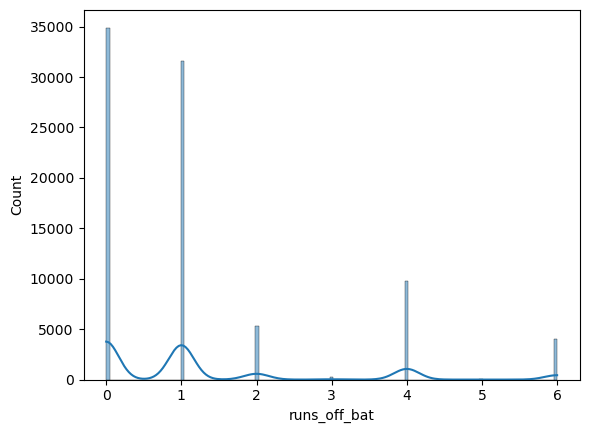

In [349]:
sns.histplot(df["runs_off_bat"], kde=True)
plt.show()

In [350]:
fig = px.histogram(df11, x='winner')
fig.show()

In [351]:
df_final = df.merge(df11, on="matchId")

In [352]:
df11.head(2)

matchId                  event  season Season Wise match_number  \
0   335982  Indian Premier League    2008                   2008-1   
1   335983  Indian Premier League    2008                   2008-2   

   Total Matches     Date_x gender                        team1  \
0              1  4/18/2008   male  Royal Challengers Bangalore   
1              2  4/19/2008   male                 Punjab Kings   

                   team2                  toss_winner  ...  Season  \
0  Kolkata Knight Riders  Royal Challengers Bangalore  ...    2008   
1    Chennai Super Kings          Chennai Super Kings  ...    2008   

   Match-Season Wise Total Match Num       Date_y              Team Name  \
0             2008-1               1  18/04/2008   Kolkata Knight Riders   
1             2008-2               2  19/04/2008     Chennai Super Kings   

                        Versus  \
0  Royal Challengers Bangalore   
1                 Punjab Kings   

                                               Venue  \
0      M Chinnaswamy Stadium (Bengaluru, Bangalore)    
1  Punjab Cricket Association IS Bindra Stadium (...   

                                    result Result target  
0  Kolkata Knight Riders won by 140 runs        0    223  
1     Chennai Super Kings won by 33 runs        0    241  

[2 rows x 30 columns]

In [353]:
df.head(2)

matchId  innings  season start_date                  venue  over_ball  \
0   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.1   
1   335982        2    2008  4/18/2008  M Chinnaswamy Stadium        0.2   

   Over  ball                 batting_team           bowling_team  ...  \
0     0     1  Royal Challengers Bangalore  Kolkata Knight Riders  ...   
1     0     2  Royal Challengers Bangalore  Kolkata Knight Riders  ...   

  each_ball_runs current_score target  Runs_Left  Balls_Left  wickets  \
0              1             1    223        222         119        0   
1              1             2    223        221         118        0   

   total_wickets  Wickets_Left  Current_Run_Rate  Required_Run_Rate  
0              0            10               6.0          11.193277  
1              0            10               6.0          11.237288  

[2 rows x 33 columns]

In [354]:
df_final.head(2)

matchId  innings  season_x start_date                venue_x  over_ball  \
0   335982        2      2008  4/18/2008  M Chinnaswamy Stadium        0.1   
1   335982        2      2008  4/18/2008  M Chinnaswamy Stadium        0.2   

   Over  ball                 batting_team           bowling_team  ... Season  \
0     0     1  Royal Challengers Bangalore  Kolkata Knight Riders  ...   2008   
1     0     2  Royal Challengers Bangalore  Kolkata Knight Riders  ...   2008   

  Match-Season Wise Total Match Num       Date_y              Team Name  \
0            2008-1               1  18/04/2008   Kolkata Knight Riders   
1            2008-1               1  18/04/2008   Kolkata Knight Riders   

                        Versus                                          Venue  \
0  Royal Challengers Bangalore  M Chinnaswamy Stadium (Bengaluru, Bangalore)    
1  Royal Challengers Bangalore  M Chinnaswamy Stadium (Bengaluru, Bangalore)    

                                    result  Result  target_y  
0  Kolkata Knight Riders won by 140 runs         0       223  
1  Kolkata Knight Riders won by 140 runs         0       223  

[2 rows x 62 columns]

In [355]:
df_final.shape

(85952, 62)

In [356]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85952 entries, 0 to 85951
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matchId                   85952 non-null  int64  
 1   innings                   85952 non-null  int64  
 2   season_x                  85952 non-null  int64  
 3   start_date                85952 non-null  object 
 4   venue_x                   85952 non-null  object 
 5   over_ball                 85952 non-null  float64
 6   Over                      85952 non-null  int64  
 7   ball                      85952 non-null  int64  
 8   batting_team              85952 non-null  object 
 9   bowling_team              85952 non-null  object 
 10  striker                   85952 non-null  object 
 11  non_striker               85952 non-null  object 
 12  bowler                    85952 non-null  object 
 13  runs_off_bat              85952 non-null  int64  
 14  extras

In [357]:
df_final.columns

Index(['matchId', 'innings', 'season_x', 'start_date', 'venue_x', 'over_ball',
       'Over', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'total_runs', 'wicket_type',
       'player_dismissed', 'each_ball_runs', 'current_score', 'target_x',
       'Runs_Left', 'Balls_Left', 'wickets', 'total_wickets', 'Wickets_Left',
       'Current_Run_Rate', 'Required_Run_Rate', 'event', 'season_y',
       'Season Wise match_number', 'Total Matches', 'Date_x', 'gender',
       'team1', 'team2', 'toss_winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'dl_applied', 'neutralvenue', 'venue_y', 'D/L',
       'toss_decision', 'city', 'winner', 'Season', 'Match-Season Wise',
       'Total Match Num', 'Date_y', 'Team Name', 'Versus', 'Venue', 'result',
       'Result', 'target_y'],
      dtype='object')

## Visualization

In [358]:
df_final_num = df_final.select_dtypes(include=['int', 'float'])

In [359]:
df_final_num.head()

matchId  innings  season_x  over_ball  Over  ball  runs_off_bat  extras  \
0   335982        2      2008        0.1     0     1             1       0   
1   335982        2      2008        0.2     0     2             0       1   
2   335982        2      2008        0.3     0     3             0       0   
3   335982        2      2008        0.4     0     4             1       0   
4   335982        2      2008        0.5     0     5             1       0   

   wides  noballs  ...  Total Matches  win_by_runs  win_by_wickets  \
0    0.0      0.0  ...              1        140.0             0.0   
1    1.0      0.0  ...              1        140.0             0.0   
2    0.0      0.0  ...              1        140.0             0.0   
3    0.0      0.0  ...              1        140.0             0.0   
4    0.0      0.0  ...              1        140.0             0.0   

   dl_applied  neutralvenue  D/L  Season  Total Match Num  Result  target_y  
0           0             0    0    2008                1       0       223  
1           0             0    0    2008                1       0       223  
2           0             0    0    2008                1       0       223  
3           0             0    0    2008                1       0       223  
4           0             0    0    2008                1       0       223  

[5 rows x 36 columns]

In [360]:
df_final_cat = df_final.select_dtypes(include='object')

In [361]:
df_final_cat

start_date                           venue_x  \
0      4/18/2008             M Chinnaswamy Stadium   
1      4/18/2008             M Chinnaswamy Stadium   
2      4/18/2008             M Chinnaswamy Stadium   
3      4/18/2008             M Chinnaswamy Stadium   
4      4/18/2008             M Chinnaswamy Stadium   
...          ...                               ...   
85947  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85948  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85949  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85950  5/29/2022  Narendra Modi Stadium, Ahmedabad   
85951  5/29/2022  Narendra Modi Stadium, Ahmedabad   

                      batting_team           bowling_team       striker  \
0      Royal Challengers Bangalore  Kolkata Knight Riders      R Dravid   
1      Royal Challengers Bangalore  Kolkata Knight Riders      W Jaffer   
2      Royal Challengers Bangalore  Kolkata Knight Riders      W Jaffer   
3      Royal Challengers Bangalore  Kolkata Knight Riders      W Jaffer   
4      Royal Challengers Bangalore  Kolkata Knight Riders      R Dravid   
...                            ...                    ...           ...   
85947               Gujarat Titans       Rajasthan Royals     DA Miller   
85948               Gujarat Titans       Rajasthan Royals  Shubman Gill   
85949               Gujarat Titans       Rajasthan Royals  Shubman Gill   
85950               Gujarat Titans       Rajasthan Royals     DA Miller   
85951               Gujarat Titans       Rajasthan Royals  Shubman Gill   

        non_striker    bowler player_dismissed                  event  \
0          W Jaffer  AB Dinda              NaN  Indian Premier League   
1          R Dravid  AB Dinda              NaN  Indian Premier League   
2          R Dravid  AB Dinda              NaN  Indian Premier League   
3          R Dravid  AB Dinda              NaN  Indian Premier League   
4          W Jaffer  AB Dinda              NaN  Indian Premier League   
...             ...       ...              ...                    ...   
85947  Shubman Gill  R Ashwin              NaN  Indian Premier League   
85948     DA Miller  R Ashwin              NaN  Indian Premier League   
85949     DA Miller  R Ashwin              NaN  Indian Premier League   
85950  Shubman Gill  R Ashwin              NaN  Indian Premier League   
85951     DA Miller  OC McCoy              NaN  Indian Premier League   

      Season Wise match_number  ...  \
0                       2008-1  ...   
1                       2008-1  ...   
2                       2008-1  ...   
3                       2008-1  ...   
4                       2008-1  ...   
...                        ...  ...   
85947                  2022-74  ...   
85948                  2022-74  ...   
85949                  2022-74  ...   
85950                  2022-74  ...   
85951                  2022-74  ...   

                                             venue_y toss_decision       city  \
0      M Chinnaswamy Stadium (Bengaluru, Bangalore)          field  Bangalore   
1      M Chinnaswamy Stadium (Bengaluru, Bangalore)          field  Bangalore   
2      M Chinnaswamy Stadium (Bengaluru, Bangalore)          field  Bangalore   
3      M Chinnaswamy Stadium (Bengaluru, Bangalore)          field  Bangalore   
4      M Chinnaswamy Stadium (Bengaluru, Bangalore)          field  Bangalore   
...                                              ...           ...        ...   
85947             Narendra Modi Stadium (Ahmedabad)            bat  Ahmedabad   
85948             Narendra Modi Stadium (Ahmedabad)            bat  Ahmedabad   
85949             Narendra Modi Stadium (Ahmedabad)            bat  Ahmedabad   
85950             Narendra Modi Stadium (Ahmedabad)            bat  Ahmedabad   
85951             Narendra Modi Stadium (Ahmedabad)            bat  Ahmedabad   

                      winner Match-Season Wise       Date_y  \
0      Kolkata Knight Riders            2008-1  18/04/2008    
1      Kolk

In [362]:
from warnings import filterwarnings
filterwarnings('ignore')

### Most number of wins by team for every seasons

Each IPL season has a fair share of excitement and adulation. No team other than Chennai Super Kings(in 2010 and 2011) was able to win the IPL trophy in succession. That is a testimony to the unpredictability of IPL.

Let’s analyze the team with the most wins in each season.

In [363]:
teams_per_season = df11.groupby('season')['winner'].value_counts()
teams_per_season

season  winner               
2008    Rajasthan Royals         13
        Punjab Kings             10
        Chennai Super Kings       9
        Delhi Capitals            7
        Mumbai Indians            7
                                 ..
2022    Punjab Kings              7
        Kolkata Knight Riders     6
        Sunrisers Hyderabad       6
        Chennai Super Kings       4
        Mumbai Indians            4
Name: winner, Length: 126, dtype: int64

In [364]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Capitals'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Punjab Kings'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 11)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Chennai Super Kings'), 10)
((2020, 'Mumbai Indians'), 11)
((2021, 'Chennai Super Kings'), 11)
((2022, 'Gujarat Titans'), 12)


The number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn).

In [365]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired');

From the above plot we can say that Mumbai Indian and Chennai Super Kings have consistently performed well over multiple seasons, while others may have more variable performance. Additionally, the plot may show trends in the overall competitiveness of the league, such as whether the number of wins is becoming more evenly distributed among different teams over time.

From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).

Observations:
Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, 2019 and 2020).

### The venue that hosted the maximum number of matches

In [366]:
df11.columns

Index(['matchId', 'event', 'season', 'Season Wise match_number',
       'Total Matches', 'Date_x', 'gender', 'team1', 'team2', 'toss_winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'dl_applied',
       'neutralvenue', 'venue', 'D/L', 'toss_decision', 'city', 'winner',
       'Season', 'Match-Season Wise', 'Total Match Num', 'Date_y', 'Team Name',
       'Versus', 'Venue', 'result', 'Result', 'target'],
      dtype='object')

In [367]:
venue_ser = df11['venue'].value_counts()

In [368]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

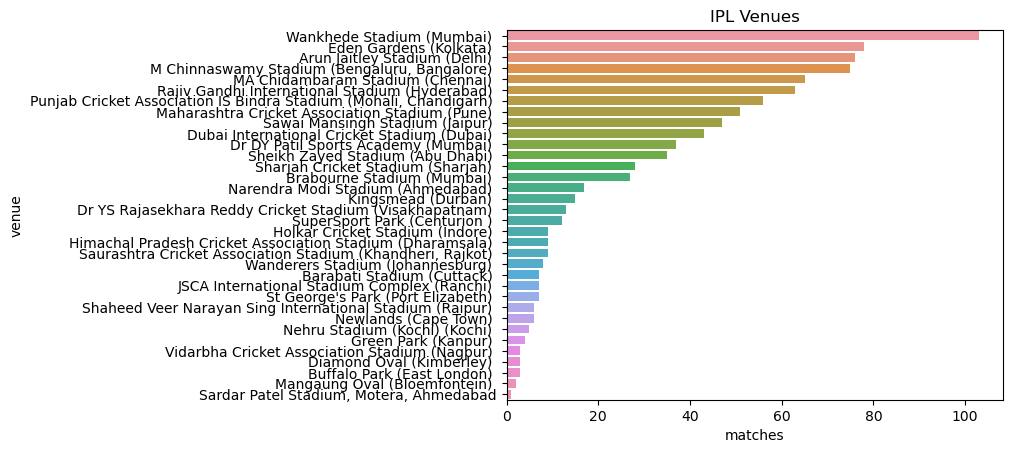

In [369]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [370]:
df11['venue'].value_counts().nunique()

27

Observations:

Wankhede Stadium has hosted the maximum number of IPL matches followed by Eden Gardens and Arun Jitley stadium. IPL matches were hosted by 27 venues.

### The most successful IPL team

In a game of sports, every team competes for victory. Hence, the team that has registered the most number of victories is the most successful.

In [371]:
team_wins_ser = df11['winner'].value_counts()
team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [372]:
team_wins_df.value_counts()

team                         wins
Chennai Super Kings          121     1
Deccan Chargers              29      1
Delhi Capitals               100     1
Gujarat Lions                13      1
Gujarat Titans               12      1
Kochi Tuskers Kerala         6       1
Kolkata Knight Riders        111     1
Lucknow Super Giants         9       1
Mumbai Indians               129     1
Pune Warriors                12      1
Punjab Kings                 98      1
Rajasthan Royals             94      1
Rising Pune Supergiant       15      1
Royal Challengers Bangalore  107     1
Sunrisers Hyderabad          74      1
dtype: int64

<AxesSubplot:title={'center':'Total Victories of IPL Teams'}, xlabel='wins', ylabel='team'>

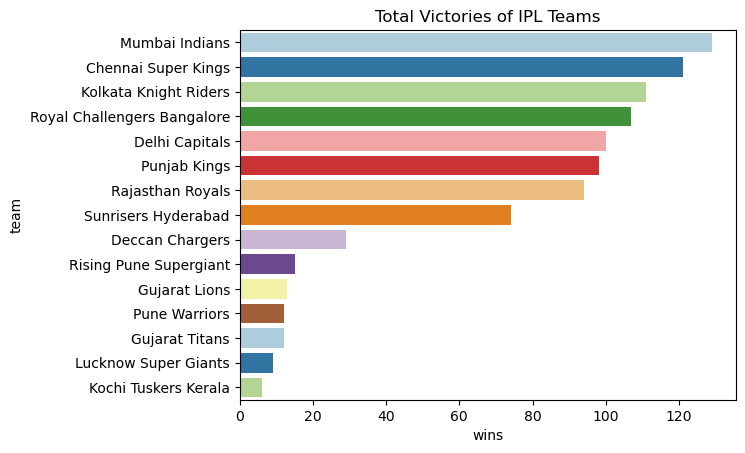

In [373]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired')

Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -129) followed by Chennai Super Kings and Kolkata Knight Riders.

### Most Valuable Player

Winning matters the most in a competitive league match. If a player makes the most significant contribution to his team’s victory, then he’s chosen as the player_of_match. The player who has won the player_of_match title on most occasions is the most valuable player

In [374]:
df11.columns

Index(['matchId', 'event', 'season', 'Season Wise match_number',
       'Total Matches', 'Date_x', 'gender', 'team1', 'team2', 'toss_winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'dl_applied',
       'neutralvenue', 'venue', 'D/L', 'toss_decision', 'city', 'winner',
       'Season', 'Match-Season Wise', 'Total Match Num', 'Date_y', 'Team Name',
       'Versus', 'Venue', 'result', 'Result', 'target'],
      dtype='object')

In [375]:
mvp_ser = df11['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1

In [376]:
mvp_ten_df.value_counts()

player          wins
AB de Villiers  24      1
CH Gayle        22      1
DA Warner       18      1
G Gambhir       13      1
KA Pollard      14      1
MS Dhoni        17      1
RG Sharma       18      1
SK Raina        14      1
SR Watson       16      1
YK Pathan       15      1
dtype: int64

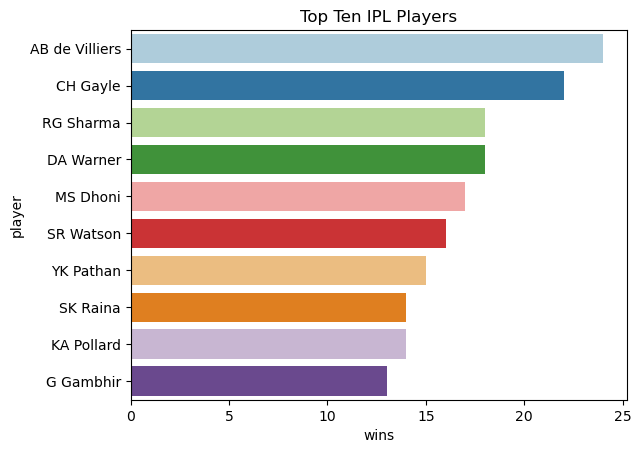

In [377]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

Observations:

 AB de villers is the player who won the most player of the match awards(24) and hence is the most valuable player.
    Five Indian players have figured in the top ten IPL players list.

### The team that won the most number of toss

In [378]:
toss_ser = df11['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True)
toss_df

team wins
0                Mumbai Indians  120
1                Delhi Capitals  113
2         Kolkata Knight Riders  112
3           Chennai Super Kings  108
4   Royal Challengers Bangalore  102
5              Rajasthan Royals   96
6                  Punjab Kings   91
7           Sunrisers Hyderabad   73
8               Deccan Chargers   43
9                 Pune Warriors   20
10                Gujarat Lions   14
11       Rising Pune Supergiant   13
12               Gujarat Titans   10
13         Kochi Tuskers Kerala    8
14         Lucknow Super Giants    7

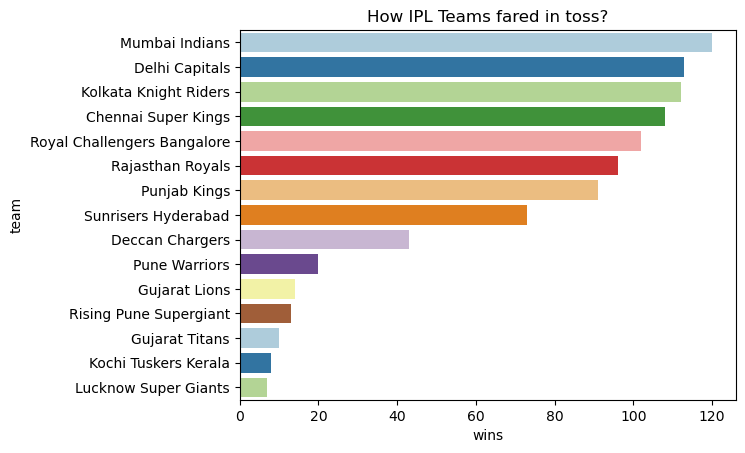

In [379]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

Observations:

    Mumbai Indians has won the most toss in IPL history. We can assume all the top teams in IPL are successful in winning 
    the toss as well.

### Does the presence of the most valuable players in a team ensures the IPL trophy

In [380]:
mvp_ten_df

player wins
0  AB de Villiers   24
1        CH Gayle   22
2       RG Sharma   18
3       DA Warner   18
4        MS Dhoni   17
5       SR Watson   16
6       YK Pathan   15
7        SK Raina   14
8      KA Pollard   14
9       G Gambhir   13

We have figured out the top ten players of IPL using the ‘Player of the Match’ title as the yardstick. It is interesting to note that the top two players — Chris Gayle and AB de Villers have never won an IPL. Of the top ten players, 6 players(RG Sharma, MS Dhoni, DA Warner, SR Watson, SK Raina, and G Gambhir) have won the IPL. It exemplifies the importance of the presence of the most valuable player(s) in a team.

### Does winning the toss has any advantage

In [381]:
df11.columns

Index(['matchId', 'event', 'season', 'Season Wise match_number',
       'Total Matches', 'Date_x', 'gender', 'team1', 'team2', 'toss_winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'dl_applied',
       'neutralvenue', 'venue', 'D/L', 'toss_decision', 'city', 'winner',
       'Season', 'Match-Season Wise', 'Total Match Num', 'Date_y', 'Team Name',
       'Versus', 'Venue', 'result', 'Result', 'target'],
      dtype='object')

In [382]:
win_count = 0
for index, value in df11.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(df11)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    

The number of times the team winning toss have won: 482
The probability of winning if won the toss: 0.52


The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 482 instances when the team losing the toss has won the game.

#### Toss win match win

In [383]:
df11["Toss_win_match_win"]= df11.apply(lambda row: 1 if row['winner'] in [row['toss_winner']] else 0, axis=1)

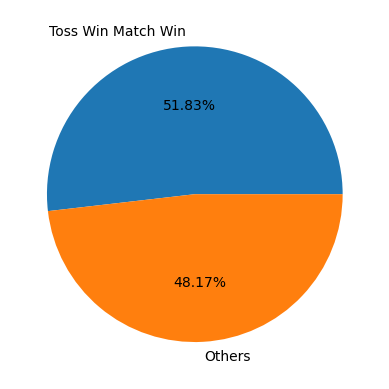

In [384]:
plt.pie(df11.Toss_win_match_win.value_counts(),autopct = "%.2f%%",labels = ['Toss Win Match Win','Others'])
plt.show()

The probability of winning if won the toss: 51.83%
and others: 48.17%

In [385]:
df_final.columns

Index(['matchId', 'innings', 'season_x', 'start_date', 'venue_x', 'over_ball',
       'Over', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'total_runs', 'wicket_type',
       'player_dismissed', 'each_ball_runs', 'current_score', 'target_x',
       'Runs_Left', 'Balls_Left', 'wickets', 'total_wickets', 'Wickets_Left',
       'Current_Run_Rate', 'Required_Run_Rate', 'event', 'season_y',
       'Season Wise match_number', 'Total Matches', 'Date_x', 'gender',
       'team1', 'team2', 'toss_winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'dl_applied', 'neutralvenue', 'venue_y', 'D/L',
       'toss_decision', 'city', 'winner', 'Season', 'Match-Season Wise',
       'Total Match Num', 'Date_y', 'Team Name', 'Versus', 'Venue', 'result',
       'Result', 'target_y'],
      dtype='object')

In [386]:
df_final.total_runs.value_counts()

1    35372
0    30561
4     9940
2     5582
6     3987
3      319
5      165
7       26
Name: total_runs, dtype: int64

In [387]:
'''
# Filter for first innings scores only
first_innings_data = df_final[df_final['innings'] == 1]

# Group the data by venue and calculate the total runs scored in the first innings at each venue
venue_runs = first_innings_data.groupby('venue_x')['total_runs'].sum()

# Get the top 10 venues with the most runs
top_10_venues = venue_runs.nlargest(10).index

# Filter the data to include only the top 10 venues
top_10_data = first_innings_data[first_innings_data['venue_x'].isin(top_10_venues)]

# Group the top 10 data by venue and calculate the total runs scored in the first innings at each venue
top_10_venue_runs = top_10_data.groupby('venue')['total_runs'].sum()

# Create a bar plot of the total runs scored in the first innings at each of the top 10 venues
fig, ax = plt.subplots()
ax.bar(top_10_venue_runs.index, top_10_venue_runs.values)
ax.set_xlabel('Venue')
ax.set_ylabel('Total runs scored in first innings')
ax.set_title('Top 10 venues with most runs scored in first innings')
plt.xticks(rotation=90)
plt.show()
'''

"\n# Filter for first innings scores only\nfirst_innings_data = df_final[df_final['innings'] == 1]\n\n# Group the data by venue and calculate the total runs scored in the first innings at each venue\nvenue_runs = first_innings_data.groupby('venue_x')['total_runs'].sum()\n\n# Get the top 10 venues with the most runs\ntop_10_venues = venue_runs.nlargest(10).index\n\n# Filter the data to include only the top 10 venues\ntop_10_data = first_innings_data[first_innings_data['venue_x'].isin(top_10_venues)]\n\n# Group the top 10 data by venue and calculate the total runs scored in the first innings at each venue\ntop_10_venue_runs = top_10_data.groupby('venue')['total_runs'].sum()\n\n# Create a bar plot of the total runs scored in the first innings at each of the top 10 venues\nfig, ax = plt.subplots()\nax.bar(top_10_venue_runs.index, top_10_venue_runs.values)\nax.set_xlabel('Venue')\nax.set_ylabel('Total runs scored in first innings')\nax.set_title('Top 10 venues with most runs scored in first

In [388]:
df_final.isna().sum()/len(df_final)*100

matchId       0.0
innings       0.0
season_x      0.0
start_date    0.0
venue_x       0.0
             ... 
Versus        0.0
Venue         0.0
result        0.0
Result        0.0
target_y      0.0
Length: 62, dtype: float64

In [389]:
df_final.neutralvenue.unique()

array([0, 1], dtype=int64)

In [390]:
df_final[["venue_x","venue_y","Venue"]].sample(5)

venue_x  \
18975                M Chinnaswamy Stadium   
66722  Dubai International Cricket Stadium   
68255                 Sheikh Zayed Stadium   
78248   Dr DY Patil Sports Academy, Mumbai   
18081                     Wankhede Stadium   

                                             venue_y  \
18975  M Chinnaswamy Stadium (Bengaluru, Bangalore)    
66722   Dubai International Cricket Stadium (Dubai)    
68255              Sheikh Zayed Stadium (Abu Dhabi)    
78248           Dr DY Patil Sports Academy (Mumbai)    
18081                     Wankhede Stadium (Mumbai)    

                                               Venue  
18975  M Chinnaswamy Stadium (Bengaluru, Bangalore)   
66722   Dubai International Cricket Stadium (Dubai)   
68255              Sheikh Zayed Stadium (Abu Dhabi)   
78248           Dr DY Patil Sports Academy (Mumbai)   
18081                     Wankhede Stadium (Mumbai)

In [391]:
df_final.columns

Index(['matchId', 'innings', 'season_x', 'start_date', 'venue_x', 'over_ball',
       'Over', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'total_runs', 'wicket_type',
       'player_dismissed', 'each_ball_runs', 'current_score', 'target_x',
       'Runs_Left', 'Balls_Left', 'wickets', 'total_wickets', 'Wickets_Left',
       'Current_Run_Rate', 'Required_Run_Rate', 'event', 'season_y',
       'Season Wise match_number', 'Total Matches', 'Date_x', 'gender',
       'team1', 'team2', 'toss_winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'dl_applied', 'neutralvenue', 'venue_y', 'D/L',
       'toss_decision', 'city', 'winner', 'Season', 'Match-Season Wise',
       'Total Match Num', 'Date_y', 'Team Name', 'Versus', 'Venue', 'result',
       'Result', 'target_y'],
      dtype='object')

In [392]:
df_final.head(2)

matchId  innings  season_x start_date                venue_x  over_ball  \
0   335982        2      2008  4/18/2008  M Chinnaswamy Stadium        0.1   
1   335982        2      2008  4/18/2008  M Chinnaswamy Stadium        0.2   

   Over  ball                 batting_team           bowling_team  ... Season  \
0     0     1  Royal Challengers Bangalore  Kolkata Knight Riders  ...   2008   
1     0     2  Royal Challengers Bangalore  Kolkata Knight Riders  ...   2008   

  Match-Season Wise Total Match Num       Date_y              Team Name  \
0            2008-1               1  18/04/2008   Kolkata Knight Riders   
1            2008-1               1  18/04/2008   Kolkata Knight Riders   

                        Versus                                          Venue  \
0  Royal Challengers Bangalore  M Chinnaswamy Stadium (Bengaluru, Bangalore)    
1  Royal Challengers Bangalore  M Chinnaswamy Stadium (Bengaluru, Bangalore)    

                                    result  Result  target_y  
0  Kolkata Knight Riders won by 140 runs         0       223  
1  Kolkata Knight Riders won by 140 runs         0       223  

[2 rows x 62 columns]

#### droping columns

In [393]:
df_final.drop(['matchId','season_x','start_date','striker', 'non_striker', 'bowler','wides', 'noballs', 'byes', 'legbyes',
       'penalty','player_dismissed','event','season_y', 'Season Wise match_number', 'Total Matches', 'Date_x',
       'gender', 'team1', 'team2','win_by_runs','win_by_wickets', 'player_of_match','venue_y', 'D/L','winner', 'Season', 
               'Match-Season Wise','innings',
       'Total Match Num', 'Date_y', 'Team Name', 'Versus', 'Venue', 'result','wicket_type','target_y','runs_off_bat',
          'extras','total_runs','each_ball_runs','total_wickets','wickets' ,'Over','over_ball','ball' ,'current_score'],axis=1,inplace=True)

In [394]:
df_final.head(19)

venue_x                 batting_team           bowling_team  \
0   M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
1   M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
2   M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
3   M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
4   M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
5   M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
6   M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
7   M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
8   M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
9   M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
10  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
11  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
12  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
13  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
14  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
15  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
16  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
17  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
18  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   

    target_x  Runs_Left  Balls_Left  Wickets_Left  Current_Run_Rate  \
0        223        222         119            10          6.000000   
1        223        221         118            10          6.000000   
2        223        221         117            10          4.000000   
3        223        220         116            10          4.500000   
4        223        219         115            10          4.800000   
5        223        219         114            10          4.000000   
6        223        219         113            10          3.428571   
7        223        219         113             9          3.428571   
8        223        219         112             9          3.000000   
9        223        215         111             9          5.333333   
10       223        214         110             9          5.400000   
11       223        214         109             9          4.909091   
12       223        214         108             9          4.500000   
13       223        214         107             9          4.153846   
14       223        214         106             8          3.857143   
15       223        213         105             8          4.000000   
16       223        213         104             8          3.750000   
17       223        212         103             8          3.882353   
18       223        212         102             8          3.666667   

    Required_Run_Rate                  toss_winner  dl_applied  neutralvenue  \
0           11.193277  Royal Challengers Bangalore           0             0   
1           11.237288  Royal Challengers Bangalore           0             0   
2           11.333333  Royal Challengers Bangalore           0             0   
3           11.379310  Royal Challengers Bangalore           0             0   
4           11.426087  Royal Challengers Bangalore           0             0   
5           11.526316  Royal Challengers Bangalore           0             0   
6           11.628319  Royal Challengers Bangalore           0             0   
7           11.628319  Royal Challengers Bangalore           0             0   
8           11.732143  Royal Challengers Bangalore           0             0   
9           11.621622  Royal Challengers Bangalore           0             0   
10          11.672727  Royal Challengers Bangalore           0             0   
11          11.7

In [395]:
df_final[["batting_team","bowling_team","toss_winner"]].sample(5)

batting_team                 bowling_team  \
47588  Kolkata Knight Riders                 Punjab Kings   
82495         Delhi Capitals         Lucknow Super Giants   
78052   Lucknow Super Giants          Chennai Super Kings   
63659    Chennai Super Kings               Delhi Capitals   
14766         Mumbai Indians  Royal Challengers Bangalore   

                 toss_winner  
47588  Kolkata Knight Riders  
82495   Lucknow Super Giants  
78052   Lucknow Super Giants  
63659    Chennai Super Kings  
14766         Mumbai Indians

In [396]:
df_final.venue_x.value_counts()

Eden Gardens                                            7494
Wankhede Stadium                                        7096
M Chinnaswamy Stadium                                   5482
Feroz Shah Kotla                                        5322
Dubai International Cricket Stadium                     5087
MA Chidambaram Stadium, Chepauk                         4675
Sawai Mansingh Stadium                                  4644
Wankhede Stadium, Mumbai                                3652
Punjab Cricket Association Stadium, Mohali              3440
Sharjah Cricket Stadium                                 3190
Sheikh Zayed Stadium                                    3086
Rajiv Gandhi International Stadium, Uppal               2684
Dr DY Patil Sports Academy, Mumbai                      2402
Brabourne Stadium, Mumbai                               1955
Rajiv Gandhi International Stadium                      1746
M.Chinnaswamy Stadium                                   1713
Arun Jaitley Stadium    

In [397]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85952 entries, 0 to 85951
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   venue_x            85952 non-null  object 
 1   batting_team       85952 non-null  object 
 2   bowling_team       85952 non-null  object 
 3   target_x           85952 non-null  int64  
 4   Runs_Left          85952 non-null  int64  
 5   Balls_Left         85952 non-null  int64  
 6   Wickets_Left       85952 non-null  int64  
 7   Current_Run_Rate   85952 non-null  float64
 8   Required_Run_Rate  85952 non-null  float64
 9   toss_winner        85952 non-null  object 
 10  dl_applied         85952 non-null  int64  
 11  neutralvenue       85952 non-null  int64  
 12  toss_decision      85952 non-null  object 
 13  city               85952 non-null  object 
 14  Result             85952 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 10.5+ MB


In [398]:
df_final_cat=df_final.select_dtypes(include='object')

In [399]:
df_final_cat.head()

venue_x                 batting_team           bowling_team  \
0  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
1  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
2  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
3  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
4  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   

                   toss_winner toss_decision       city  
0  Royal Challengers Bangalore         field  Bangalore  
1  Royal Challengers Bangalore         field  Bangalore  
2  Royal Challengers Bangalore         field  Bangalore  
3  Royal Challengers Bangalore         field  Bangalore  
4  Royal Challengers Bangalore         field  Bangalore

In [400]:
cat=df_final_cat.columns

In [401]:
for i in cat:
    a=df_final[i].unique()
    print(i,len(a))

venue_x 45
batting_team 10
bowling_team 10
toss_winner 10
toss_decision 2
city 28


In [402]:
df_final.head(1)

venue_x                 batting_team           bowling_team  \
0  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   

   target_x  Runs_Left  Balls_Left  Wickets_Left  Current_Run_Rate  \
0       223        222         119            10               6.0   

   Required_Run_Rate                  toss_winner  dl_applied  neutralvenue  \
0          11.193277  Royal Challengers Bangalore           0             0   

  toss_decision       city  Result  
0         field  Bangalore       0

In [403]:
df_final.rename(columns={'venue_x':'Venue','target_x':'Target','batting_team':'Batting_team','bowling_team':'Bowling_team','toss_winner':
                        'Toss_Winner','city':'City','neutralvenue':'Neutral_Venue','toss_decision':'Toss_Decision'},inplace=True)

In [404]:
df_final.head(1)

Venue                 Batting_team           Bowling_team  \
0  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   

   Target  Runs_Left  Balls_Left  Wickets_Left  Current_Run_Rate  \
0     223        222         119            10               6.0   

   Required_Run_Rate                  Toss_Winner  dl_applied  Neutral_Venue  \
0          11.193277  Royal Challengers Bangalore           0              0   

  Toss_Decision       City  Result  
0         field  Bangalore       0

### Enoding 

In [405]:
final=pd.get_dummies(data=df_final,drop_first=True)

In [406]:
final

Target  Runs_Left  Balls_Left  Wickets_Left  Current_Run_Rate  \
0         223        222         119            10          6.000000   
1         223        221         118            10          6.000000   
2         223        221         117            10          4.000000   
3         223        220         116            10          4.500000   
4         223        219         115            10          4.800000   
...       ...        ...         ...           ...               ...   
85947     131          7          15             7          7.085714   
85948     131          7          14             7          7.018868   
85949     131          6          13             7          7.009346   
85950     131          4          12             7          7.055556   
85951     131          0          11             7          7.321101   

       Required_Run_Rate  dl_applied  Neutral_Venue  Result  \
0              11.193277           0              0       0   
1              11.237288           0              0       0   
2              11.333333           0              0       0   
3              11.379310           0              0       0   
4              11.426087           0              0       0   
...                  ...         ...            ...     ...   
85947           2.800000           0              0       1   
85948           3.000000           0              0       1   
85949           2.769231           0              0       1   
85950           2.000000           0              0       1   
85951           0.000000           0              0       1   

       Venue_Arun Jaitley Stadium, Delhi  ...  City_Kimberley  City_Kolkata  \
0                                      0  ...               0             0   
1                                      0  ...               0             0   
2                                      0  ...               0             0   
3                                      0  ...               0             0   
4                                      0  ...               0             0   
...                                  ...  ...             ...           ...   
85947                                  0  ...               0             0   
85948                                  0  ...               0             0   
85949                                  0  ...               0             0   
85950                                  0  ...               0             0   
85951                                  0  ...               0             0   

       City_Mumbai  City_Navi Mumbai  City_Port Elizabeth  City_Pune  \
0                0                 0                    0          0   
1                0                 0                    0          0   
2                0                 0                    0          0   
3                0                 0                    0          0   
4                0                 0                    0          0   
...            ...               ...                  ...        ...   
85947            0                 0                    0          0   
85948            0                 0                    0          0   
85949            0                 0                    0          0   
85950            0                 0                    0          0   
85951            0                 0                    0          0   

       City_Raipur  City_Ranchi  City_Sharjah  City_Visakhapatnam  
0                0            0             0                   0  
1                0            0             0                   0  
2                0            0             0                   0  
3                0            0             0                   0  
4                0            0             0                   0  
...            ...          ...           ...                 ...  
85947            0            0             0                   0  
85948            0         

### TRAIN_TEST_SPLIT

In [407]:
from sklearn.model_selection import train_test_split

In [408]:
x=final.drop('Result',axis=1)
y=final['Result']

In [409]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=30)

In [410]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(60166, 107) (60166,) (25786, 107) (25786,)


### MODEL BUILDING

In [411]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [412]:
from sklearn.linear_model import LogisticRegression

In [413]:
lr=LogisticRegression()

In [414]:
model_lr=lr.fit(xtrain,ytrain)

In [415]:
y_pred=model_lr.predict(xtest)

In [416]:
from sklearn.metrics import classification_report

In [417]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     12035
           1       0.82      0.84      0.83     13751

    accuracy                           0.81     25786
   macro avg       0.81      0.81      0.81     25786
weighted avg       0.81      0.81      0.81     25786



### since the precision,recall and f1_scores are low we need to built a better model

### Plot_roc_curve

In [418]:
from sklearn.metrics import plot_roc_curve

In [419]:
plot_roc_curve(estimator=model_lr,X=xtest,y=ytest)

### from the curve we can say that the area under curve has to increased by creating a better model that it has to cover about 80 percent of the plot

In [420]:
from sklearn.metrics import roc_auc_score

In [421]:
roc_auc_score(ytest,y_pred)

0.8120184362767349

In [422]:
from sklearn.metrics import cohen_kappa_score

In [423]:
kappa = cohen_kappa_score(ytest, y_pred)

# Print the kappa score
print("Cohen's kappa score:", kappa)

Cohen's kappa score: 0.6251485640127185


### the roc_auc_score has to be optimal of about 80 are above than we can say the model as a good model

### AdaBoost Model

In [424]:
ac=AdaBoostClassifier()

In [425]:
ac_model=ac.fit(xtrain,ytrain)

In [426]:
y_ac_pred=ac_model.predict(xtest)

In [427]:
print(classification_report(ytest,y_ac_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81     12035
           1       0.83      0.84      0.83     13751

    accuracy                           0.82     25786
   macro avg       0.82      0.82      0.82     25786
weighted avg       0.82      0.82      0.82     25786



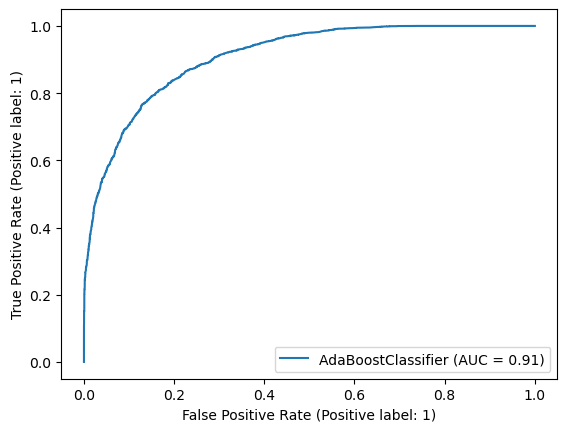

In [428]:
plot_roc_curve(estimator=ac_model,X=xtest,y=ytest)

In [429]:
roc_auc_score(ytest,y_ac_pred)

0.8203585722526444

In [430]:
kappa = cohen_kappa_score(ytest, y_ac_pred)
print("Cohen's kappa score:", kappa)

Cohen's kappa score: 0.641102704982994


### Naive bayes

In [431]:
gnb = GaussianNB()
model_gnb=gnb.fit(xtrain,ytrain)
y_pred_gnb=model_gnb.predict(xtest)

In [432]:
print(classification_report(y_pred_gnb,ytest))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69     15967
           1       0.54      0.76      0.63      9819

    accuracy                           0.66     25786
   macro avg       0.67      0.68      0.66     25786
weighted avg       0.70      0.66      0.67     25786



In [433]:
plot_roc_curve(estimator=model_gnb,X=xtest,y=ytest)

In [434]:
kappa = cohen_kappa_score(ytest, y_pred_gnb)
print("Cohen's kappa score:", kappa)

Cohen's kappa score: 0.33957203618676324


### KNeighborsClassifier

In [435]:
knc = KNeighborsClassifier()
knc_model = knc.fit(xtrain,ytrain)
y_pre_knc_model = knc_model.predict(xtest)

In [436]:
print(classification_report(ytest,y_pre_knc_model))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     12035
           1       0.91      0.91      0.91     13751

    accuracy                           0.90     25786
   macro avg       0.90      0.90      0.90     25786
weighted avg       0.90      0.90      0.90     25786



In [437]:
plot_roc_curve(estimator=knc_model,X=xtest,y=ytest)

In [438]:
kappa = cohen_kappa_score(ytest, y_pre_knc_model)
print("Cohen's kappa score:", kappa)

Cohen's kappa score: 0.8086953965406639


### Tuning

In [439]:
#from sklearn.model_selection import GridSearchCV

#from sklearn.metrics import r2_score

#KNeighborsClassifier()

In [440]:
# param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# # Create KNeighborsClassifier instance
# knn = KNeighborsClassifier()

In [441]:
# # Create GridSearchCV instance
# grid = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

In [442]:
# # Fit GridSearchCV instance to data
# grid.fit(xtrain,ytrain)

In [443]:
# # Print best hyperparameters and corresponding accuracy score
# print('Best hyperparameters:', grid.best_params_)
# print('Best accuracy score:', grid.best_score_)

In [444]:
# y_pred_grid=grid.predict(xtest)